In [39]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from cvxopt import matrix, solvers
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm
from IPython.display import display

# **Support Vector Machines (SVM)**

## **Introduction** 
One of the most important concepts in the field of Machine Learning is **classification**. It's widely used in email SPAM detection, image recognition, face recognition, **sentiment analysis** and many more. The main problem of traditional ML algorithms for classification is handling high-dimensional data. One algorithm that solves that problem is **Support Vector Machine (SVM)**. What allows SVM to work with high-dimentional data is a clever technique called the **Kernel trick**. In this tutorial I'm going to explain Support Vector Machines, the mathematical concepts behind them, their methods, what is the Kernel trick and how it works, implementations and applications. Support Vector Machine is a powerful **supervised** machine learning algorithm that is used for linear or non-linear classification, regression and outlier detection.The primary objective of the SVM algorithm is to find the optimal **hyperplane** in an N-dimentional space(N-number of **features**) that can separate the **data points** of different classes in the feature space.This separation is achieved with the maximum possible **margin**.

methodologies and math concepts 
1. how does it work
2. vsichki drugi gluposti
3. nekvi drugi raboti
4. kernel trick/kernel functions

## **Some definitions and explanations to make things more clear**
1. **Classification** is a supervised machine learning method where the model tries to predict the correct label of a given input data. In classification, the model is fully trained using the training data, and then it is evaluated on test data before being used to perform prediction on new unseen data.[1]

2. **Sentiment analysis** is the process of analyzing digital text to determine if the emotional tone of the message is positive, negative, or neutral.[2]

3. **Supervised** machine learning, is a subcategory of machine learning and artificial intelligence. It is defined by its use of labeled data sets to train algorithms that to classify data or predict outcomes accurately.[3] SVM's are a supervised algorithm because they need labeled data to find the hyperplane in the first place.

4. **Hyperplane** is a decision boundary that separates data points into different classes. In two-dimensional space, a hyperplane is simply a line that separates the data points into two classes. In three-dimensional space, a hyperplane is a plane that separates the data points into two classes.[4] It divides the input space into two or more regions, each corresponding to a different class or output label.[5]

5. **Data points**- In the case of support vector machines, a data point is viewed as a N-dimensional vector (a list of numbers), and we want to know whether we can separate such points with a N-dimensional hyperplane.[6]

6. **Features** is an individual measurable property within a recorded dataset. In machine learning and statistics, features are often called “variables” or “attributes”.[7] Some example features in a dataset could be age, height, weight

7. **Margin** is the distance between the decision boundary (hyperplane) and the closest data points from each class. The main objective of the support vector e algorithm is to maximize the margin. The wider margin indicates better classification performance.[8][9] 

8. **Support vectors** are the closest data points to the hyperplane. These data points are important because they determine the position and orientation of the hyperplane.[10]

9. **Linear SVM** tries to find a straight line (in 2D) or a hyperplane (in higher dimensions) that separates the data into different classes with the maximum possible margin.[11]

10. **Hard Margin** is used when the data is perfectly linearly separable. It finds a hyperplane that separates the classes with no misclassifications. The objective is to identify a hyperplane that completely separates data points belonging to different classes, ensuring a clear demarcation with the utmost margin width possible.[12]

11. **Soft Margin** is used when the data is not perfectly separable. It allows some misclassifications to achieve a better overall separation. It introduces flexibility by allowing some margin violations (misclassifications) to handle cases where the data is not perfectly separable. Suitable for scenarios where the data may contain noise or outliers. It Introduces a penalty term for misclassifications, allowing for a trade-off between a wider margin and a few misclassifications.[13]

12. **Outlier** is a data point that is noticeably different from the rest. They represent errors in measurement, bad data collection, or simply show variables not considered when collecting the data.[14] A single data point that goes far outside the average value of a group of statistics.[15]

13. **Missclasification**(not Missclasification rate) Occurs when data points are assigned to a different category than the one they should be in[16].

14. **Missclasification rate** is a metric that tells us the percentage of observations that were incorrectly predicted by some classification model.[17] 

15. **Non-Linear SVM** (simply explained) is necessary when the data cannot be effectively separated by a linear decision boundary in the original feature space. Nonlinear SVM addresses this limitation by utilizing kernel functions to map the data into a higher-dimensional space where linear separation becomes possible. [18]

16. **Convex optimization** refers to a class of optimization problems where the objective function is convex, and the feasible region defined by the constraints is also convex. A convex function has the property that a line segment connecting any two points on the function lies above or on the function. This property ensures that any local minimum is also a global minimum, making convex optimization problems easier to solve reliably.

17. **Quadratic programming** is the process of solving certain mathematical optimization problems involving quadratic functions. Specifically, one seeks to optimize (minimize or maximize) a multivariate quadratic function subject to linear constraints on the variables. Quadratic programming is a type of nonlinear programming. [58]

18. **Cvxopt** is a Python library for convex optimization, providing functions for solving standard convex optimization problems like linear programs (LP), quadratic programs (QP), second-order cone programs (SOCP), and more. It uses efficient algorithms to solve these problems and is commonly used in mathematical optimization tasks.

19.  **Neural Networks** A neural network is a machine learning program, or model, that makes decisions in a manner similar to the human brain, by using processes that mimic the way biological neurons work together to identify phenomena, weigh options and arrive at conclusions. [59]

20. **Convex and Concave**

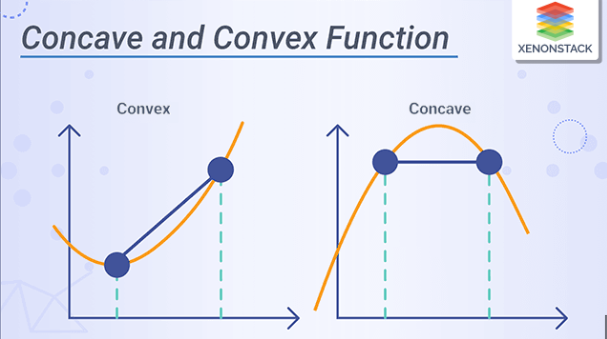      [60]

## **Methodologies, math concepts and definitions**

### How does (Linear) SVM work - Basic intuition....
I shall not scare you away with much theory and math still. I will introduce you to the algorithm by explaining it simply.
Each object of the dataset is represented as a point in an N-dimensional space. SVM's performs classification by "drawing" a hyperplane and all points of one category are on one side of the hyperplane, and all points of the other category are on the otherside.There could be multiple hyperplanes but SVM tries to find the one that best seperates the categories in the sense that it maximizes the distance to points in either category.The distance is called the margin and the points that fall on the margin are called support vectors. To find the hyperplane SVM requires a training set of points already labeled with the category, that is why it's a supervised algorithm. In other words SVM needs those support vectors in order to determine where to position the hyperplane. The ideal hyperplane is the one that is positioned equally half-way between the two support vectors.[19]

Did i scare you away yet?? Good, then I shall make life "easier" by giving an example of how **linear SVM** works, because it's key to understanding the basics which we are going to built on. 

Let's imagine that we have a dataset that has two tags (green and blue), and the dataset has two features x1 and x2. We want a classifier that can classify the pair(x1, x2) of coordinates in either green or blue.

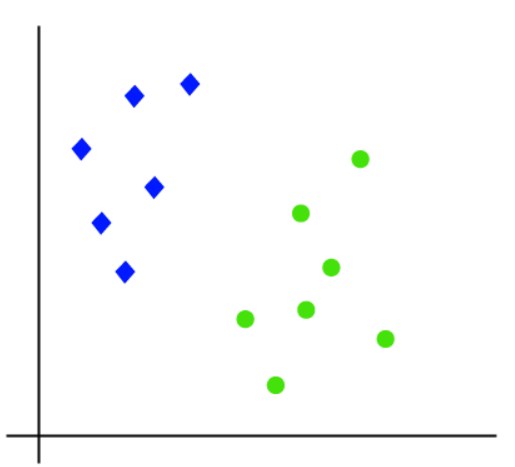 [20]

By the looks of it it's a 2-d space so by just using a straight line, we can easily distinguish these two classes. But there can be multiple lines(hyperplanes) that can separate these classes.

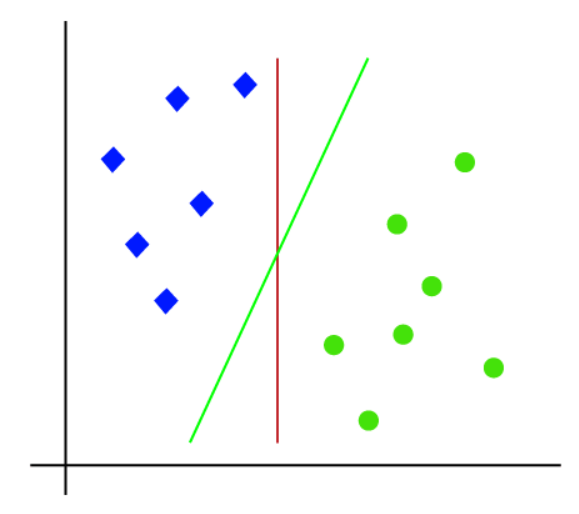  [21]

SVM finds the one that represents the largest separation or margin between the two classes. The algorithm finds the closest points from both classes, also called the support vectors and it "draws" the line in such a way that it's position and orientation maximize the distance between the two points. That is what we call the optimal hyperplane. To put it simply, the support vectors supervise the creation of the hyperplane.

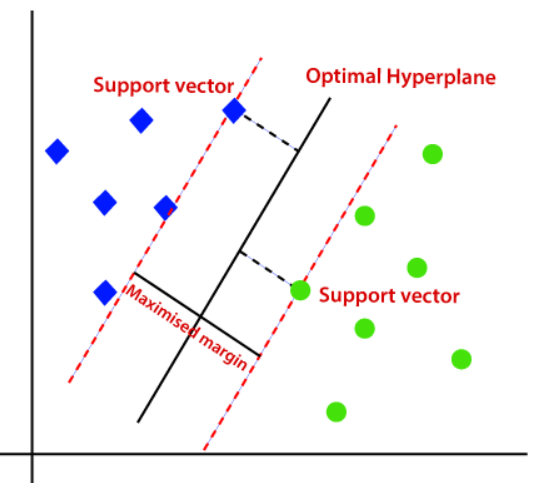 [22]

And that way we separated the two classes of the linear SVM, every object on the left side of the hyperplane would be categorized as blue and every object on the right side would be categorized as green. Every new observation with features that position it in either side of the hyperplane would be classified depending on which side it will be.

So far so good, we found the hyperplane whose distance to the nearest data point on each side is maximized. If such a hyperplane exists it is known as the maximum-margin hyperplane or the **hard margin**. The hard margin works amazing when the data is perfectly linearly seperable, but what happens when things aren't perfect, which is the case in most real life situations. 

Let's see what happens if we have another situation where we have seperated two classes of blue and red circles, but there is one problem, we have **outlier** that is not where it belongs, a blue point in the red side of the hyperplane. This is called **missclasification**. Hard margins were amazing until now, but they don't work well with missclasifications. Every single outlier can make it impossible for them to find a perfect separation. 

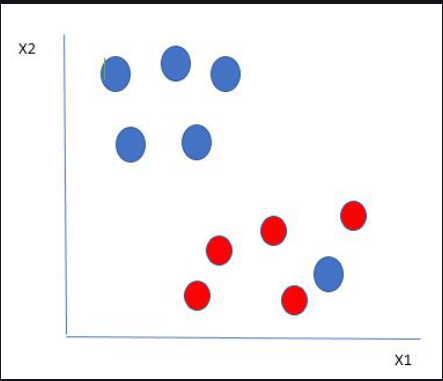 [23]

This still counts as linear SVM, but the outlier makes it almost impossible for the hard-margin technique to succeed in it's purpose. In these situations we use a technique called **soft margin**. A soft margin SVM is used when the data is not perfectly separable. It allows some misclassifications to achieve a better overall separation. In this situation SVM finds the maximum margin as done with previous data sets. Along with that it adds a **penalty** each time a point crosses the margin. It introduces a penalty term for misclassifications, allowing for a trade-off between maximizing the margin and minimizing classification errors.

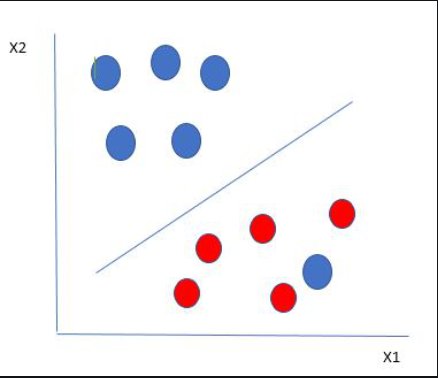 [24]

This was a pretty vague explanation of soft margin, but don't worry I will dwelve into it in a bit.

Furthermore what happens when data is not even linearly seperable anymore, something like this.

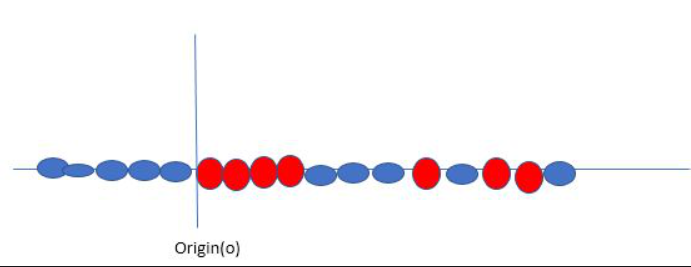 [25]

And that's where we use **Non-linear SVM's**, but in order for me to explain them in an understandable and useful manner I shall end with the "basic" part here and explain everything from the beginning, but this time with more theory and a "little bit" of math.

### Math concepts behind Support vector machines, methodologies and deeper understanding.

You still here? Amazing! I will reward that by beginning with some easier and fundamental math concepts and definitions.
Let's begin with something simple, that is the basis of all.......And that is the vector.....Get it Support VECTOR Machines..

**1.VECTOR** A vector is a mathematical object that has both magnitude and direction. It is often represented as an ordered list of numbers, which correspond to its coordinates in a given space.[26] A point in the 2D plane can be represented as a vector between origin and the point.

**Notation of vector:** A vector is typically denoted by a boldface letter (e.g. $\mathbf{x}$) or by an arrow above the letter (e.g., $\vec{x}$
). In written text, vectors are often represented as:$$\mathbf{x} = \begin{bmatrix} 
x_1 \\ 
x_2 \\ 
\vdots \\ 
x_n 
\end{bmatrix}$$
where \($x_1, x_2, \ldots, x_n\$) are the components of the vector.

**Visual example of a vector:** 

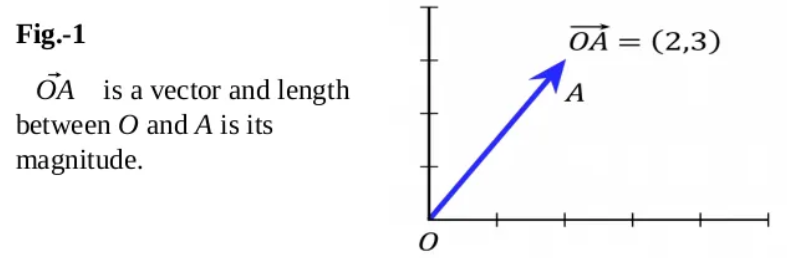 [27]

Let's see what the magnitude and direction of a vector are, how do you calculate them?

**1.1 Length of a vector or "magnitude":** tells us how far vectors are from the origin. It's called a *norm* and is written as $\left\lVert \mathbf{x} \right\rVert$. There are different types of norms, but the one we need here is called The Euclidean norm $\mathbf{L_{2}}$ or literally the Pythagora's theorem.The Euclidean norm formula to calculate the norm of a vector $\mathbf{x}$= \($x_1, x_2, \ldots, x_n\$) ) is

$$ \left\lVert \mathbf{x} \right\rVert = \sqrt{(x_1)^2 + (x_2)^2 + \ldots + (x_n)^2} $$:
**Example for finding the magnitude of a vector:** 

Let's say we have a vector $\vec{OA}(3,4)$ .We can easily find the magnitude of the vector.
$$\left\lVert \mathbf{OA} \right\rVert = \sqrt{3^2 + 4^2}$$
$$\left\lVert \mathbf{OA} \right\rVert = \sqrt{9 + 16}$$
$$\left\lVert \mathbf{OA} \right\rVert = \sqrt{25}$$
$$\left\lVert \mathbf{OA} \right\rVert = 5$$

Good we now know what the length of a vector is....I hope. Now let's see what the direction of a vector is

**1.2 Direction of a vector** The direction of a vector is the angle made by the vector with the horizontal axis [28] The direction of a vector $\mathbf{x} = (x_{1}, x_{2})$ is noted as $w$. It is defined as: $w = (\frac{x_{1}}{\left\lVert \mathbf{x} \right\rVert}, \frac{x_{2}}{\left\lVert \mathbf{x} \right\rVert} )$ ....... We can also call that a **unit vector**. A vector that has a magnitude of 1 is a unit vector. It is also known as Direction Vector. For example, vector $\mathbf{x}$(1,3) is not a unit vector, because its magnitude is not equal to 1, $\left\lVert \mathbf{x} \right\rVert \neq 1$ . Any vector can become a unit vector by dividing it by the magnitude of the given vector. 

**Example for finding the direction of a vector**
We will take a vector $\mathbf{u}$ with the same coordinates as in the magnitude example $\mathbf{u}(3,4)$

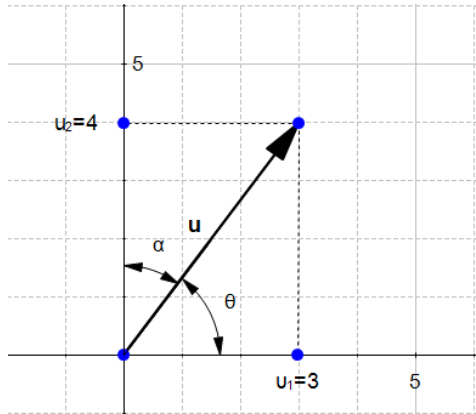 [30]

The direction of that vector we can get by finding the unit vector....and now we know what it is. We divide the vector by it's magnitude(we already know that the magnitude is equal to 5).
We shall calculate it with the first coordinate: 3
$$\frac{u_{1}}{\left\lVert \mathbf{u} \right\rVert} = \frac{3}{5} = 0.6 $$

And now with the other coordinate: 4

$$\frac{u_{2}}{\left\lVert \mathbf{u} \right\rVert} = \frac{4}{5} = 0.8$$

Now we see that the direction of the vector is (0.6, 0.8) and if we draw it(remember the norm is equal to 1 so the x and y end in 1)

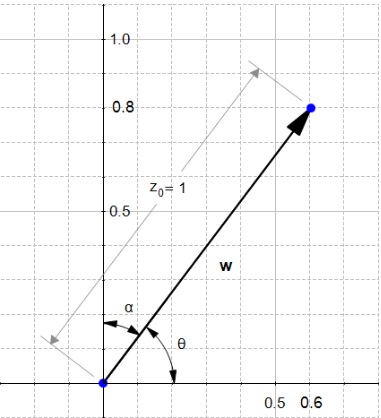 [31]

We can see that it looks the same as the original one, but it's smaller as it's norm is equal one. With the help of this small but vital vector we can now determine the direction of a vector. There might also be other ways, but for the sake of keeping it simple(especially me) this is the one i chose.

**1.3 Dot product of a vector**
One very important concept to understand in SVM's is the **dot product**.  The dot product, also known as the inner product or scalar product, is a mathematical operation that takes two vectors and returns a scalar value. In the case of SVM with kernels, the dot product is used to measure the similarity or dissimilarity between two feature vectors.[32]. It tells how to vectors are related. 
Geometrically, it is the product of the magnitudes of the two vectors $ \left\lVert \mathbf{x} \right\rVert\left\lVert \mathbf{y} \right\rVert\ $ and the cosine of the angle between them $\cos \theta$  [33]
$$\mathbf{x} \cdot \mathbf{y} = \left\lVert \mathbf{x} \right\rVert\left\lVert \mathbf{y} \right\rVert\cos \theta.$$

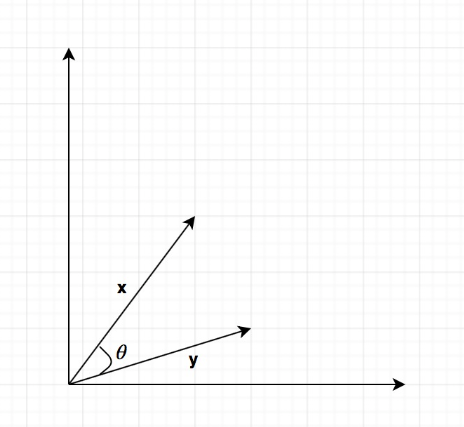 [34]

And how do we get the theta $\theta$ ?? Let's say that $\beta$ is the angle between $\mathbf{x}$ and  $\mathbf{y}$ $\alpha$ is the angle between the x-axis and  $\mathbf{y}$  

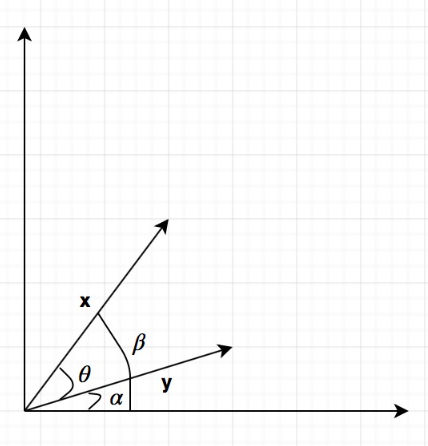

By looking at this figure we can say that $\theta$ is $\beta$ - $\alpha$, then we can get 
$$\cos(\theta) = \cos(\beta - \alpha)$$
$$\cos\beta\cos\alpha + \sin\beta\sin\alpha$$
$$\frac{x_{1}}{\left\lVert \mathbf{x} \right\rVert}\frac{y_{1}}{\left\lVert \mathbf{y} \right\rVert} + \frac{x_{2}}{\left\lVert \mathbf{x} \right\rVert}\frac{y_{2}}{\left\lVert \mathbf{y} \right\rVert}$$
$$\frac{x_{1}y_{1} + x_{2}y_{2}}{\left\lVert \mathbf{x} \right\rVert \left\lVert \mathbf{y} \right\rVert}$$

We substitute this into the geometric dot product formula, we get:
$$x \cdot y = \left\lVert \mathbf{x} \right\rVert \left\lVert \mathbf{y} \right\rVert \frac{x_{1}y_{1} + x_{2}y_{2}}{\left\lVert \mathbf{x} \right\rVert \left\lVert \mathbf{y} \right\rVert}  = x_{1}y_{1} + x_{2}y_{2}$$

This is the algebraic formula of dot product. In general, dot product can be computed as the following for two n-dimensional vectors: [35]
$$x \cdot y = \sum_{i=1}^{n} x_i y_i$$
This is what we mostly use to find the dot product that is crucial to the definition of our next concept....the hyperplane
And before I get into that I shall mention again what linear separability is and then connect all other concepts to it....until we reach the point where we face with non-linear separability

**2.Linear separability** is one important concept in SVM. Although in practical cases the data might not be linearly separable, we will start from the linearly separable cases (since they are easy to understand and deal with) and then derive the non-linearly separable cases.[36]

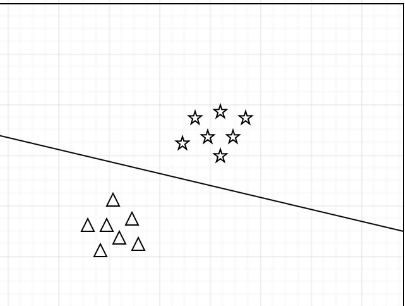 [37]

**3 Hyperplane** It is plane that linearly divide the n-dimensional data points in two component. In case of 2D, hyperplane is line, in case of 3D it is plane.It is also called as n-dimensional line.[38]

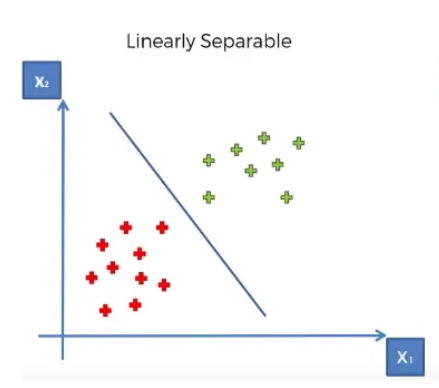 [39]

The two-dimensional linearly separable data can be separated by a line. The function of the line is $y = ax + b$, which is. For example we will rename x with $x_{1}$ and y with $x_{2}$ and we will get 
$$ax_{1} - x_{2} + b = 0$$
If we define $\mathbf{x} = (x_{1}, x_{2})$ and $\mathbf{w} = (a, -1)$ , we will get
$$\mathbf{w} \cdot \mathbf{x} + b = 0$$
Where: 
1. $\mathbf{w}$ is a normal vector perpendicular to the hyperplane.
2. $\mathbf{x}$ is a point on the hyperplane
3. $b$ is the bias term or intercept.

Feel confused?...No worries i will try to explain. You probably know that an equation of a line is: $y = ax + b$ , if you didn't congratulations, now you know. And how does this equation help with the hyperplane??? In the hyperplane equation you can see that the name of the variables are in bold. Which means that they are vectors! Moreover this is how we compute dot product. To generalize the two equations are just different ways of expressing the same thing. But using the formula derived from the one of the function of the line (aka the hyperplane formula)$\mathbf{w} \cdot \mathbf{x} + b = 0$ is easier to work in more than two dimensions with this notation and the vector $\mathbf{w}$  will always be norma(normal because we use this vector to define the hyperplane, so by definition it will be normal.When we define a hyperplane, we suppose that we have a vector that is orthogonal to the hyperplane)....And this last property will come in handy to compute the distance from a point to the hyperplane.

**4.Classification with hyperplanes** In a binary classification problem, we want to find a hyperplane that separates the data points of two classes. Once we have the hyperplane, we can then use the hyperplane to make predictions. We define the hypothesis function h as:[40]
$$
h(x_i) = \begin{cases}
+1 & \text{if } \mathbf{w} \cdot \mathbf{x} + b \geq 0 \\
-1 & \text{if } \mathbf{w} \cdot \mathbf{x} + b < 0
\end{cases}
$$
The point above or on the hyperplane will be classified as class +1, and the point below the hyperplane will be classified as class -1.So basically, the goal of the SVM learning algorithm is to find a hyperplane which could separate the data accurately. There might be many such hyperplanes. And we need to find the best one, which is often referred as the **optimal hyperplane.** [41]

**5.Margin** The margin is the distance between the hyperplane and the nearest data points from either class. The goal of SVM is to find the hyperplane that maximizes this margin. To find the optimal hyperplane, we maximize the margin while ensuring all points are correctly classified. The margin is defined as: $\gamma = \frac{2}{\left\lVert \mathbf{w} \right\rVert}$

Let's derive the formula really quick. So we get the hyperplane equation( $\mathbf{w} \cdot \mathbf{x} + b = 0$) and we consider the support vectors and with them(the classifications aka both sides of the hyperplane +1 and -1) we get $\mathbf{w} \cdot \mathbf{x} + b = \pm 1$. Here I shall introduce a really simple yet effective concept,

**5.1 Distance from a point to the hyperplane**- The perpendicular distance $d$ from a point $\mathbf{x_{0}}$ to the hyperplane 
$$ d = \frac{\left| \mathbf{w} \cdot \mathbf{x}_0 + b \right|}{\|\mathbf{w}\|} $$
For support vectors, this distance is:
$$d = \frac{\left| 1 \right|}{\|\mathbf{w}\|} = \frac{1}{\|\mathbf{w}\|}$$

The margin is defined as the distance between the two parallel hyperplanes that pass through the support vectors of each class. The total margin width is therefore:
$$ 2 \times \frac{1}{\|\mathbf{w}\|} = \frac{2}{\|\mathbf{w}\|} $$

I know I probably tired you with concepts until now, but the fun only begins. All of this I (at least tried) to describe, because they are the fundamentals of the **SVM optimization problem**.

**6.Optimization problem(linear...hard margin)** When the data is perfectly linearly separable, we aim to find a hyperplane that separates the data points of different classes with the maximum margin and no classification errors. To maximize the margin, we need to minimize the norm of the weight vector$\left\lVert \mathbf{w} \right\rVert$ while ensuring all points are correctly classified(it has a constraint $y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 \; \forall i$). 

The optimization problem can be formulated as follows:

**Objective:**
$$\min_{\mathbf{w}, b} \; \frac{1}{2} \left\lVert \mathbf{w} \right\rVert^{2}$$

**Constraints:**

$$y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 \; \forall i$$

Where:
- $\mathbf{w}$ is the weight vector.
- $b$ is the bias term.
- $y_i$ is the class label for the $i$-th data point, which can be $+1$ or $-1$.
- $\mathbf{x}_i$ is the feature vector of the $i$-th data point.

**Objective Function:**

The term $\frac{1}{2} \left\lVert \mathbf{w} \right\rVert^{2}$ is minimized to ensure the margin is maximized. The factor of $\frac{1}{2}$ is used for mathematical convenience, making the derivatives cleaner.

**Constraints:**

The constraint $y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1$ ensures that each data point is correctly classified and lies outside or on the margin boundaries.

- For a point $\mathbf{x}_i$ from class $+1$, this means $\mathbf{w} \cdot \mathbf{x}_i + b \geq 1$.
- For a point $\mathbf{x}_i$ from class $-1$, this means $\mathbf{w} \cdot \mathbf{x}_i + b \leq -1$.

**Geometric Interpretation:**

The margin is the distance between the two parallel hyperplanes:
$$\mathbf{w} \cdot \mathbf{x} + b = 1$$
$$\mathbf{w} \cdot \mathbf{x} + b = -1$$

The hard margin SVM optimization problem can also be called **convex optimization problem**, specifically framed as **Quadratic Programming problem(QP)**. This problem is convex because the objective function $\frac{1}{2}\left\lVert \mathbf{w} \right\rVert^{2}$ is a convex function (a quadratic function), and the constraints $y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1$ define a convex feasible region).

We now probably know the objective of the optimization problem, we just need to minimie $\left\lVert \mathbf{w} \right\rVert$ to maximize the margin, sounds simple, but there is a lot more going on underneath it and we shall try and understand how to solve that constrained optimization problem. To solve To solve the constrained optimization problem, we use the method of Lagrange multipliers. A quick disclaimer..here the math get's interesting.

**7.Lagrange formulation/Lagrange problem**
As I stated before that to solve this constrained optimization problem, we introduce Lagrange multipliers($\alpha_{i} \geq 0$) for each constraint $y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1$  . These are variables that allow us to incorporate the constraints into the objective function.
The Lagrangian function $L_P$ combines the objective function and the constraints using Lagrange multipliers $\alpha_i$
.
The Lagrangian function for the primal formulation of SVM is given 

$$L_p(\mathbf{w},b,\mathbf{\alpha}) = \frac{1}{2} \left\lVert \mathbf{w} \right\rVert^{2} - \sum_{i=1}^{n} \alpha_i[y_i(\mathbf{w} \cdot \mathbf{x}_i + b) - 1] $$$
$
**Breakdown of the problem**
- $\mathbf{w}$ is the weight vector,
- $b$ is the bias term,
- $\boldsymbol{\alpha} = (\alpha_1, \alpha_2, \ldots, \alpha_n)$ are the Lagrange multipliers associated with each constraint,
- $y_i$ is the class label for the $i$-th data point,
- $\mathbf{x}_i$ is the feature vector of the $i$-th data point
- $|\mathbf{w}\|^2 = \mathbf{w} \cdot \mathbf{w}$ is the squared norm of the weight vector, which we want to minimize.

**Objective Term:**$ \frac{1}{2} \|\mathbf{w}\|^2 $
This term is what we want to minimize: the squared length of the weight vector $\mathbf{w}$. Minimizing this helps to maximize the margin.(Sorry that I'm repeating myself...just making sure you remember

**Constraint Terms:**
$$ \sum_{i=1}^{n} \alpha_i \left[ y_i (\mathbf{w} \cdot \mathbf{x}_i + b) - 1 \right] $$
- Each constraint $y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 $ is incorporated into the Lagrangian with a multiplier $\alpha_i$.
- If the constraint is satisfied, the term $\alpha_i [ y_i (\mathbf{w} \cdot \mathbf{x}_i + b) - 1 ] $ is zero.
- If the constraint is violedat, the Lagrange multipli i$will be adjusted to penalize the viotiot]


**7.1 Karush-Kuhn-Tucker(KKT) conditions** are used in optimization to handle constraints in a systematic way. They are essential in the context of Support Vector Machines (SVMs).The Karush-Kuhn-Tucker (KKT) conditions provide necessary and sufficient conditions for optimality. Let's go through all of them one by one.

**1.Stationarity conditions** - To find the optimal $\mathbf{w}$ and $b$, we take the **partial derivatives** of the Lagrangian with respect to $\mathbf{w}$ and $b$ and set them  zero

**Partial derivative with respect to $\mathbf{w}:$**

$$\frac{\partial L_P}{\partial \mathbf{w}} = \mathbf{w} - \sum_{i=1}^{n} \alpha_i y_i \mathbf{x}_i = 0$$

**Solving for $\mathbf{w}$:**
$$\mathbf{w} = \sum_{i=1}^{n} \alpha_i y_i \mathbf{x}_i$$

This equation tells us that the optimal weight vector $\mathbf{w}$ is a linear combination of the training data points $\mathbf{x}_i$, weighted by the Lagrange multipliers $\alpha_{i}$ and their corresponding labels $y_{i}$

**Partial derivative with respect to $b$**
$$\frac{\partial L_P}{\partial b} = - \sum_{i=1}^{n} \alpha_i y_i = 0$$

This condition ensures that the sum of the products of the Lagrange multipliers and the class labels equals zero:
$$\sum_{i=1}^{n}\alpha_i y_i = 0 $$

**2.Primal feasibility and Dual feasibility**

**Primal feasibility**
$$y_{i}(\mathbf{w} \cdot \mathbf{x}_{i} + b) \geq 1$$

This ensures that all data points are correctly classified with a margin of at least 1

**Dual feasibility**
$$\alpha_{i} \geq 0$$

The Lagrange multipliers must be non-negative

**3.Complementary slackness** 

The complementary slackness condition states that for each $i$, either the constant $y_{i}(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1$ is active  (i.e., it holds with equality) or the corresponding Lagrange multiplier $\alpha_i$ is zero:
$$\alpha_i[y_i(\mathbf{w} \cdot \mathbf{x}_i + b) - 1]= 0$$

This means that if $\alpha_i > 0$, then $y_i(\mathbf{w} \cdot \mathbf{x}_i + b) = 1$ , these points are called support vectors.

**8.Dual problem** 
A quick RECAP. The primal problem of the hard margin SVM is to find the hyperplane that separates two classes with the maximum margin. And here we can introduce the dual problem.

The dual problem often simplifies the computation, especially when the number of constraints (data points) is larger than the number of features (dimensionality).It is easier to solve because it only involves the Lagrangian multipliers.

**Formulating the dual problem**
1. To derive the dual problem, we start by constructing the Lagrangian. This combines the objective function and the constraints using Lagrange multipliers(I know i am repeating myself).
2. We find the stationary conditions(partial derivatives with respect to $\mathbf{w}$ and $b$).

And here comes the next step:



3. We substitute $\mathbf{w}$ back into the Lagrangian: Replacing $\mathbf{w}$ with $\mathbf{w} = \sum_{i=1}^{n} \alpha_i y_i \mathbf{x}_i$

$$L_p = \frac{1}{2}(\sum_{i=1}^{n} \alpha_i y_i \mathbf{x}_i)\cdot(\sum_{j=1}^{n} \alpha_j y_j \mathbf{x}_j) - \sum_{i=1}^{n} \alpha_i[y_i(\sum_{i=1}^{n}\alpha_j y_j(\mathbf{x}_i\cdot \mathbf{x}_j)+ b)-1]$$

Simplify it:
$$L_p = \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_i\alpha_j y_i y_j(\mathbf{x}_i \cdot \mathbf{x}_j) - \sum_{i=1}^{n} \alpha_i$$

**Dual problem**
The dual problem is now to maximize the dual objective function:
$$max_\alpha\sum_{i=1}^{n} \alpha_i -\frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_i\alpha_j y_i y_j(\mathbf{x}_i \cdot \mathbf{x}_j)$$

Subject to:
$$\sum_{i=1}^{n}\alpha_i y_i = 0$$
$$\alpha_i \geq 0   \forall_i$$

**Solving the dual problem**

To solve the dual problem, we typically use quadratic programming (QP) methods. Once we find the optimal $\alpha_i$, we can compute the weight vector $\mathbf{w}$ and the bias term $b$...This means we can finally find the optimal hyperplane:

**Weight vector $\mathbf{w}$**

$$\mathbf{w} = \sum_{i=1}^{n}\alpha_i y_i \mathbf{x}_i$$

**Bias term b**:

The bias term can be determined using the support vectors $\mathbf{x}_k$ (data points for which 0 < $\alpha_k$):

$$b = y_k - \mathbf{w} \cdot \mathbf{x}_k$$

By solving the dual problem, we can efficiently find the maximum-margin hyperplane, even in high-dimensional or non-linear spaces using the kernel trick. This approach leverages the power of quadratic programming to handle complex optimization problems in SVMs.

**8.Conclusion to the Lagrangian/Dual problem**
The hard margin linear SVM aims to find the hyperplane that maximally separates two classes with no misclassifications. It does this by minimizing the norm of the weight vector, while ensuring all data points are correctly classified. To handle this optimization efficiently, we use the Lagrangian dual problem.

1. Primal Problem: Minimize the weight vector's norm while ensuring all points are correctly classified.
2. Lagrangian Dual Problem: Reformulate the problem using Lagrange multipliers to handle constraints more easily.
3. Dual Problem: Maximize a function of these multipliers, making the problem easier to solve, especially for large datasets.
4. Solution: Use the multipliers to find the optimal hyperplane.

The problem with Hard Margin SVM is that it does not tolerate outliers and it only works for linearly separable data. The reason is that if you remember our initial optimization problem the constraints are $y_i(\mathbf{w} \cdot \mathbf{x}_i + b \geq 1)$, for each example. For the optimization problem to be solvable, all the constraints have to be satisfied. If there is an outlier example which makes the constraint not be satisfied, then the optimization will not be solvable. [41]  

However, this would not be the case in the real world. It is most likely that in practical cases the data will contain some noise and might not be linearly separable. Here is where we will talk about **non-linear SVM's** and finally will discuss and learn about **soft-margin SVM'** s and the clever technique **Kernel trick** that allows SVM's to work with high-dimentional data.

**9.Non-Linear SVM's**
Sometimes, data points are not linearly separable. Non-linear SVMs handle this by mapping data into a higher-dimensional space where a linear hyperplane can separate the classes.

**10.Soft margin SVM** We summarized that hard margin SVM's don't work well with outliers in the data. In real-world data, perfect separation is often not possible due to noise and overlapping classes. Simply put hard margin doesn't allow for missclassifications.

To handle this problem, Soft margin SVMs allow some misclassifications to find a better overall classifier. We introduce slack variables $\xi_i$ to allow some missclassifications.

Basically, the trick Soft Margin SVM is using is very simple, it adds slack variables $\xi_i$ to the constraints of the optimization problem. [41]

**The constraints now become:**
$$y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i , \forall_i$$

By adding the slack variables, when minimizing the objective function, it is possible to satisfy the constraint even if the example does not meet the original constraint. The problem is we can always choose a large enough value of $\xi$ so that all examples will satisfy the constraints.[42]

One technique to handle this is to use regularization. We could us regularization to penalize large values of $\xi$. 
**The regulized optimization problem becomes:** [42]
$$\min_{\mathbf{w}, b, \xi} \frac{1}{2} \left\lVert \mathbf{w} \right\rVert^{2} + \sum_{i=1}^{n} \xi_i$$

Subject to: $y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i $

The regularization penalty is used to help stabilize the minimization of the objective or infuse prior knowledge we might have about desirable solutions[43]

Also, we want to make sure that we do not minimize the objective function by choosing negative values of $\xi$. We add the constraint $\xi_i \geq 0$. We also add a **regularization parameter C** to determine the effect of the slack variable(how much we want to avoid misclassifying each training example.)

**The optimization problem now becomes(the Soft margin optimization problem)**
$$\min_{\mathbf{w}, b, \xi} \frac{1}{2} \left\lVert \mathbf{w} \right\rVert^{2} + C \sum_{i=1}^{n} \xi_i$$

Subject to: 
$$y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i $$ $$\xi_i \geq 0$$

Again, if we use Lagrange multipliers method like above, and we do all the hard math(minimizing the Lagrangian with respect to $\mathbf{w}, b, \xi_i$ and setting their derivatives to zero), the optimization problem could be transformed to a **dual problem**:

**Dual problem Soft margin**
$$max_{\alpha}\sum_{i=1}^{n} \alpha_i - \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_i\alpha_j y_i y_j \mathbf{x}_i \cdot \mathbf{x}_j$$

Subject to: $0 \leq \alpha_i \leq C$

Here the constraint $\alpha_i \geq 0$ has been changed to $0 \leq \alpha_i \leq C$

All good until now, but what does the regularization parameter $C$ do??

**10.1 Regularization parameter C** The regularization parameter $C$ in Support Vector Machines (SVMs) controls the trade-off between achieving a larger margin and ensuring that the data points are correctly classified. It determines the effect of $\xi$. Another way of thinking of $C$ is it gives you control of how the SVM will handle errors. If we set $C$ to positive infinite, we will get the same result as the Hard Margin SVM. On the contrary, if we set $C$ to 0, there will be no constraint anymore, and we will end up with a hyperplane not classifying anything. 

Simply said: 
1. Small values of $C$ will result in a wider margin, at the cost of some misclassifications(allowing more misclassifications.)
2. Large values of $C$ will give you the Hard Margin classifier and tolerates zero constraint violation. It will prioritize minimizing misclassifications over maximizing the margin.
3. We need to find a value of $C$ which will not make the solution be impacted by the noisy data(outlier).

Good job, we now now what Soft Margin SVM's are....I hope,again. Soft Margin SVM can handle the non-linearly separable data caused by noisy data(outliers). But what if the non-linear separability is not caused by the noise? What if the data are characteristically non-linearly separable?

That is where I shall finally introduce you to the star of this whole algorithm...**The Kernel Trick/Kernel Parameters**.

**11 The Kernel Trick/Kernel Parameters** 

In machine learning, particularly in algorithms like SVMs, the primary challenge is often to find a decision boundary (hyperplane) that separates classes in the input space. However, many real-world datasets are not linearly separable, meaning a simple straight line or plane cannot effectively separate the classes.

The Kernel Trick is a method used in Support Vector Machines (SVMs) to convert data (that is not linearly separable) into a higher-dimensional feature space where it may be linearly separated. [44] We map the data into a higher-dimensional space where it becomes linearly seperable. 

Instead of explicitly transforming data, we use kernel functions to compute the inner products in this higher-dimensional space directly in the original input space.

All of this sounds confusing? Don't worry I shall explain everything thorough, give examples and of course include some math.

**11.1 Visual example of Kernel trick(to make things more clear)**

Let’s take an example to understand the kernel trick in more detail. Consider a binary classification problem where we have two classes of data points: red and blue. The data is not linearly separable in the 2D space. We can see this in the plot below: [46]

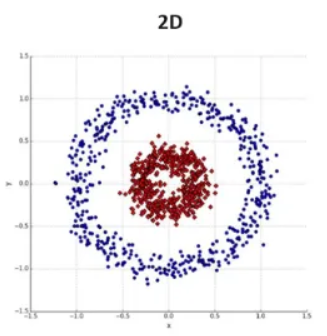 [46]

To make this data linearly separable, we can use the kernel trick.

By applying the kernel trick to the data, we transform it into a higher-dimensional feature space where the data becomes linearly separable. We can see this in the plot below, where the red and blue data points have been separated by a hyperplane in the 3D space

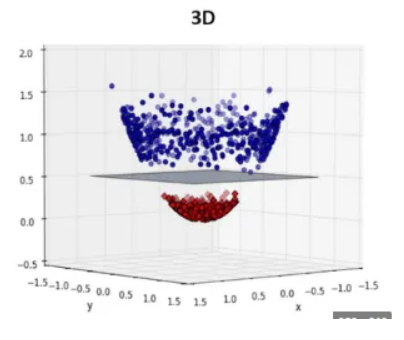 [46]



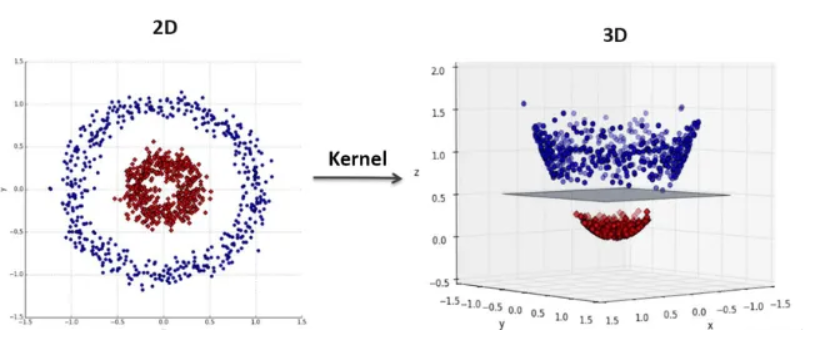 [46]

As we can see, the kernel trick has helped us find a solution for a non-linearly separable dataset.[46]

I hope this made things a bit better, because now we shall dwelve more into it.

**11.2 Feature Mapping**
Mapping data to a higher-dimensional space in the context of Support Vector Machines (SVMs) involves transforming the input data using a function $\phi(\mathbf{x})$. This transformation can make the data linearly separable in the higher-dimensional space. The kernel trick allows us to perform this mapping implicitly using kernel functions, avoiding the computational complexity of explicitly calculating it, which is really good but i still will show a quick example.

Introducing a mapping function $\phi$ that maps each data point $\mathbf{x}$ from the input space to a higher-dimensional feature space:
$$\mathbf{x} -> \phi(\mathbf{x})$$

**Inner Products:** The decision function in SVMs relies on inner products (dot products) between data points: 

$$\mathbf{w} \cdot \mathbf{x} + b$$

Becomes: 
$$\mathbf{w} \cdot \phi(\mathbf{x})+ b$$

**Example**
For understanding purposes, let’s consider an example of an explicit mapping from a two-dimensional space to a higher-dimensional space.
Consider data points in a 2D space $\mathbf{x} = [x_1, x_2]$. We want to map these points to a 3D space using the following mapping function:
$$\phi(\mathbf{x})= [x_1^{2},x_2^{2},\sqrt{2x_1 x_2}]$$


**11.3 Kernel trick**
The kernel trick allows us to work in the high-dimensional feature space without explicitly performing the transformation $\phi(\mathbf{x})$ (I know I am repeating myself,but that fact just makes this trick even better). Instead, we use a kernel function $\mathbf{K}(\mathbf{x}_i,\mathbf{x}_j)$ that computes the dot product(inner product) between the transformed feature vectors $\phi(\mathbf{x}_i)$ and $\phi(\mathbf{x}_j)$

**Mathematical formulation** 
$$\mathbf{K}(\mathbf{x}_i,\mathbf{x}_j) = \phi(\mathbf{x}_i) \cdot \phi(\mathbf{x}_j)$$

**11.4 Kernel functions/types of kernels**
There are multiple kernel types we could use to classify the data. Some of the most popular ones are linear kernel, polynomial kernel, and RBF kernel(Gaussian kernel).The choice of kernel relies on the nature of the data and the job at hand. The linear kernel is used when the data is roughly linearly separable, whereas the polynomial kernel is used when the data has a complicated curved border. The Gaussian kernel is employed when the data has no clear boundaries and contains complicated areas of overlap. [47]

**1.Linear kernel** The linear kernel is the simplest type of kernel, and it does not perform any implicit mapping of the data to a higher-dimensional space. It is essentially the standard dot product of two vectors. 

**Mathematical Formulation**
$$\mathbf{K}(\mathbf{x}_i,\mathbf{x}_j) = \phi(\mathbf{x}_i) \cdot \phi(\mathbf{x}_j)$$ 

Basically the same as the one I showed above.

**Use cases**
1. Linearly Separable Data: Best suited for data that can be separated by a straight line (in 2D) or a hyperplane (in higher dimensions).
2. High-Dimensional Sparse Data: Effective for text classification problems (e.g., spam detection) where data is sparse and high-dimensional.

**2.Polynomial kernel**The polynomial kernel represents the similarity of vectors in a feature space over polynomials of the original variables. It allows for learning non-linear models by increasing the dimensionality of the feature space polynomially.

**Mathematical formulation**
$$K(\mathbf{x}_i,\mathbf{x}_j) = (\gamma\mathbf{x}_i \cdot \mathbf{x}_j + r)^{d}$$

Where:
1. $\mathbf{x}_i$ and $\mathbf{x}_j$ are input vectors

2. $\gamma$ is a scaling factor(also called the slope).This term scales the dot product. If it's small, the influence of the dot product is reduced; if it's large, the influence is amplified.

3. $r$ is a constant term that allows the kernel to model a wider range of functions. Adding a constant allows the kernel to fit more complex models. It ensures that the decision boundary doesn't necessarily pass through the origin.

4. $d$ is the degree of the polynomial, determining the complexity of the decision boundary.Raising the term to the power $d$ introduces non-linearity. The higher the degree, the more complex the decision boundary can be. 

**2.1 Intuition**
The polynomial kernel allows us to capture interactions between features up to the degree $d$. For example if $d$ = 2 he kernel includes not just the linear terms but also quadratic terms, effectively enabling the model to learn parabolic decision boundaries.A value with 1 is just the linear kernel. 


**Use cases**
1. Moderate Complexity: Useful when the relationship between class labels and attributes is moderately complex.
2. Flexible Non-Linearity: Suitable for datasets where interactions between features can be well captured by polynomial terms.

Although there could be some problems:

1. Computational Cost: Higher-degree polynomials can be computationally expensive, especially with large datasets.
2. Overfitting Risk: High-degree polynomials may lead to overfitting, especially if the dataset is small or noisy.

The polynomial kernel is a powerful tool in machine learning for modeling non-linear relationships. By transforming the input space into higher-dimensional polynomial feature spaces, it enables algorithms like SVMs to find complex decision boundaries. 

**3.The radial basis function RBF or Gaussian kernel** The Gaussian kernel, also known as the Radial Basis Function (RBF) kernel, maps data points into an infinite-dimensional space. It is capable of handling very complex non-linear relationships by considering the distance between data points.
It will result in a more complex decision boundary. The RBF kernel contains a parameter $\gamma$. The parameter $\gamma$ plays a crucial part in controlling the behaviour of the Gaussian kernel

**Mathematical formulation**
$$K(\mathbf{x}_i,\mathbf{x}_j) = exp(-\gamma\left\lVert \mathbf{x}_i - \mathbf{x}_j\right\rVert)^{2})$$

Where:
$\mathbf{x}_i$ and $\mathbf{x}_j$ are the input vectors.
$\left\lVert \mathbf{x}_i - \mathbf{x}_j\right\rVert)$ is the Euclidean distance between the vectors
$\gamma$ is a parameter that defines the influence of each training example

**3.1 The role of $\gamma$**
The parameter $\gamma$ controls the width of the Gaussian function and determines how much influence a single training example has. It is inversely related to the variance of the Gaussian distribution.

**When $\gamma$ is high** the Gaussian function becomes narrow. This means that each data point's influence is limited to a small region around it. As a result, the decision boundary becomes more complex and can fit the training data very closely (potentially leading to overfitting Gamma high means more curvature.e..

**When $\gamma$ is low** the Gaussian function becomes wide. This means that each data point's influence extends over a larger region. As a result, the decision boundary is smoother and less sensitive to individual data points (potentially leading to underfitti Gamma low means less curvature.ng).

**3.2 Intuition**
The RBF kernel essentially measures the similarity between two data points. If the points are close to each other in the feature space, the kernel value will be close to 1. If they are far apart, the kernel value will be close to 0. 

The parameter $\gamma$ controls the rate at which this similarity drops off with distance. 

For high $\gamma$ even small distances between vectors lead to a significant decrease in the kernel value, resulting in a narrow region of influence. 

For low $\gamma$ larger distances between vectors are required to decrease the kernel value significantly, resulting in a broader region of influence.

Feel confused? Let's try with an example.

**Example**
Let's consider two vectors $\mathbf{x}_i$ = (1,2) and $\mathbf{x}_j$ = (3,4): 

1. The Euclidean distance is:
$$\left\lVert \mathbf{x}_i - \mathbf{x}_j\right\rVert)^{2} = (1-3)^{2} + (2-4)^{2} = 4 + 4 = 8$$

2. For $\gamma$ = 0.1: the kernel value is moderate, indicating some similarity.
$$K(\mathbf{x}_i,\mathbf{x}_j) = exp(-0.1 \times 8) = exp(-0.8) \approx 0.449$$

3. For $\gamma$ = 1: the kernel value is very small, indicating little similarity.
$$K(\mathbf{x}_i,\mathbf{x}_j) = exp(-1 \times 8) = exp(-8) \approx 0.0003$$

4. For $\gamma$ = 0.01: the kernel value is large, indicating high similarity.
$$K(\mathbf{x}_i,\mathbf{x}_j) = exp(-0.01 \times 8) = exp(-0,08) \approx 0.923$$

**Use cases**
1. Complex Non-Linear Data: The RBF kernel is ideal for complex, non-linear relationships in the data where a clear boundary is not evident in the original feature space.
2. Flexibility and Power: The RBF kernel's ability to implicitly map data to an infinite-dimensional space makes it very powerful and widely used in various practical scenarios.

The Gaussian (RBF) kernel is a versatile and powerful kernel function that measures the similarity between data points in an infinite-dimensional feature space. The parameter $\gamma$ plays a critical role in determining the influence of individual data points and the complexity of the decision boundary. By carefully tuning it,you can balance the trade-off between model complexity and generalization, making the RBF kernel suitable for a wide range of machine learning applications. And it is one of the most used(In practice, it is recommended to try RBF kernel first cause it normally performs well).

**11.5 Dual problem/Kernel trick in SVM's**

The problem is, if we have a large dataset containing, say, millions of examples, the transformation will take a long time to run, let alone the calculations in the later optimization problem. Let’s revisit the Wolfe dual problem:

To solve this problem, we actually only care about the result of the dot product $\mathbf{x}_i \cdot \mathbf{x}_j$  If there is a function which could calculate the dot product and the result is the same as when we transform the data into higher dimension, it would be fantastic
But we already know there is- THE KERNEL TRICKn Using the kernel trick, we can solve the SVM optimization problem in its dual form, which involves only the kernel function:

**Dual problem Kernel**
$$max_{\alpha}\sum_{i=1}^{n} \alpha_i - \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_i\alpha_j y_i y_j K(\mathbf{x}_i \cdot \mathbf{x}_j)$$

Subject to:
$$0 \leq \alpha_i \leq C$$
$$\sum_{i=1}^{n}\alpha_i y_i = 0$$.
This is a small change, but is actually a powerful trick. What it does is to calculate the result of a dot product performed in another space. We now have the ability to change the kernel function in order to classify non-linearly separable data.[48]

**Decision function**
Once we have the optimal $\alpha_i$, we can classify new data points $\mathbf{x}$ using:
$$f(\mathbf{x}) = sign(\sum_{i=1}^{n}\alpha_i y_i K(\mathbf{x}_i ,\mathbf{x}) + b)$$
The summation runs over all support vectors (data points for which $\alpha_i$ > 0
 
The dual problem for SVMs with the kernel trick allows us to solve the optimization problem without explicitly mapping the data to a high-dimensional space. Instead, we use the kernel function to compute the dot products in this high-dimensional space efficiently.

**11.6 Summary of the Kernel trick**
The kernel trick in machine learning, especially in SVMs, provides a powerful way to handle non-linear relationships in data by implicitly mapping data into higher-dimensional spaces using kernel functions. This approach allows for more flexible and accurate modeling of complex datasets without the need to explicitly compute the transformed features, making it a cornerstone in modern machine learning applications.

1. Mapping: Explicitly transforming data to a higher-dimensional space can make it linearly separable, but is computationally impractical for high dimensions.
2. Kernel Trick: Allows us to compute the inner products in the high-dimensional space using kernel functions directly on the original data.
3. Dual Formulation: In SVMs, the dual problem formulation leverages the kernel trick to handle non-linear separations efficiently.
4. Common Kernels: Linear, Polynomial, RBF, and Sigmoid kernels provide various ways to implicitly map data to higher dimensions, enabling flexible and powerful classification.

This approach makes SVMs and other kernel-based methods very powerful for dealing with complex, non-linear relationships in data.

**12.A quick summary of all**
1. Start with understanding vectors, their lengths (norms), and dot products.
2. Define a hyperplane 
3. Define the margin and aim to maximize it.
4. Formulate the primal optimization problem to maximize the margin.
5. Use Lagrange multipliers to convert it into the dual problem.
6. For non-linear data, apply the kernel trick to map data into a higher-dimensional space.
7. For real-world data, introduce slack variables to allow misclassification (Soft Margin SVM).
8. Solve the dual optimization problem.
9. Use the resulting Lagrange multipliers to form the decision function for classification.

These steps form the foundation of SVMs, providing a powerful method for classification tasks.

I think we covered the most important math concepts that are behind the support vector machines and i hope with that you got to understand how it works and why is it used. Here I shall stop torturing you with math and get on with something more pleasant....Showing you some code implementations of how the SVM's work and give an example of a classification problem solved with SVM's.





## **Implementions of SVM's**
Here we are, finally going to show SVM's in practice and see how we can work with them in python. I shall try and implement the SVM algorithm without libraries(at least once, spare me some SLACK I'm new to this, get it?? SLACK), and if that doesn't work we can always rely on our good old friends- The libraries, in this case especially Scikit Learn. The idea behind this is just for me to show some examples of the functionality of the SVM's. I will show the linear, polynomial,and RBF kernel functions. Embrace yourselves the fun ride begins.

### **Linear SVM (example with library and without)**

I shall begin with giving you a simple implementation of linear SVM with a 2D linearly seperable dataset in order to vizualize the creation of the decision boundary and what are the support vectors. To ensure the right functionality of the code and give you an accurate examlpe I shall use the Scikit Learn Library and after that try to implement it without it. 
1. We will use the integrated dataset.make_classification from SKlearn to create a synthetic 2D dataset that is linearly seperable.
2. We will also create a DataFrame. It converts the feature matrix (X) and target vector (y) into a Pandas DataFrame for easier visualization and manipulation. It names the feature columns as 'Feature 1' and 'Feature 2' and adds a 'Class' column for the class labels.(show the first 5 rows of the dataset).
3. Then we will split the data(spliting the dataset into training and testing sets. 80% of the data is used for training, and 20% is used for testing.)
4. After that we will train the linear svm using the training data
5. We will plot the original dataset to see how it is arranged(linearly seperable I hope)
6. Then we will plot the decision boundary and support vectors to see how it looks and what are those support vectors that define the hyperplane
7. And in the end we could evaluate the model(The accuracy of the trained SVM model is evaluated on the testing set, and the result is printed.)


#### **Implementation with Scikit Learn**

Dataset:
    Feature 1  Feature 2  Class
0   1.139174   0.622934     -1
1   1.069309   1.118308     -1
2  -0.965293  -1.422730      1
3  -1.599840  -0.302498      1
4  -0.465305  -1.966716      1


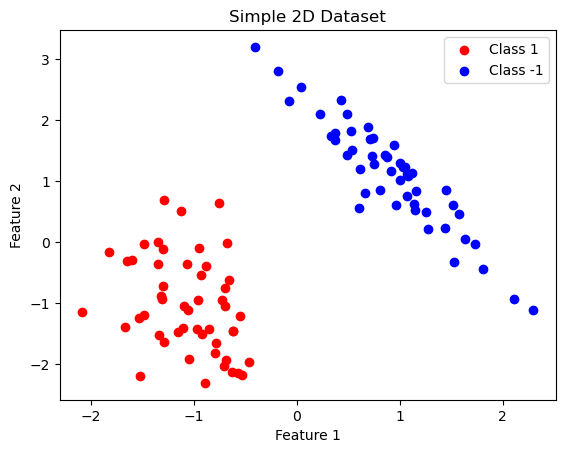

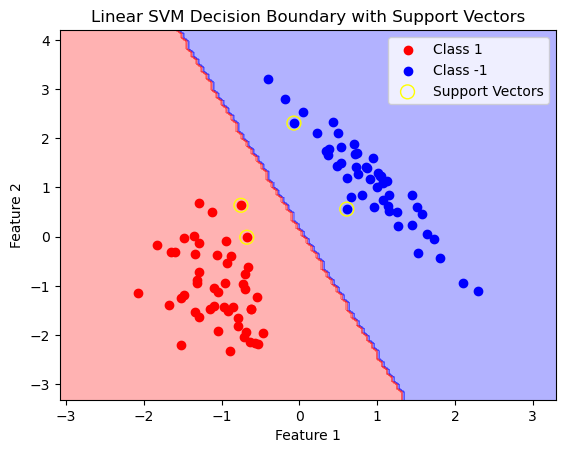

Linear SVM Accuracy: 1.0


In [9]:
def generate_dataset(random_state=40):  
    """
    Generate a synthetic 2D dataset for classification.
    
    Parameters:
    - random_state: int, sets the seed for random number generation to ensure the results are reproducible
    Returns:
    - X: ndarray(N-dimensional array), feature matrix(each row represents a sample, and each column represents a feature)
    - y: ndarray(N-dimensional array), target vector(each element represents the class label for the corresponding sample in X)
    """
    X, y = datasets.make_classification( 
        n_samples=100, n_features=2, n_informative=2, n_redundant=0,  
        n_clusters_per_class=1, random_state=random_state  
    )                                                     
    y = np.where(y == 0, -1, 1)  # Adjust labels to be -1 and 1
    return X, y

def create_dataframe(X, y):
    """
    Create a DataFrame for better visualization of the dataset. 
    Converts the feature matrix and target vector into a pandas DataFrame for easier visualization and manipulation.
    Parameters:
    - X: ndarray, feature matrix
    - y: ndarray, target vector
    
    Returns:
    - df: DataFrame, dataset with feature columns and class labels
    """
    df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
    df['Class'] = y
    return df

def plot_dataset(X, y, title='Dataset'):
    """
    Plot the dataset with two classes.
    
    Parameters:
    - X: ndarray, feature matrix
    - y: ndarray, target vector
    - title: str, title of the plot
    """
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', label='Class -1')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def plot_decision_boundary(X, y, model, title='Decision Boundary'):
    """
    Plot the decision boundary of an SVM model along with the dataset and support vectors.
    
    Parameters:
    - X: ndarray, feature matrix
    - y: ndarray, target vector
    - model: trained SVM model
    - title: str, title of the plot
    """
    x0, x1 = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X_new)
    zz = y_pred.reshape(x0.shape)
    plt.contourf(x0, x1, zz, cmap=ListedColormap(['blue', 'red']), alpha=0.3)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', label='Class -1')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='yellow', label='Support Vectors')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def main():
    # Generate and visualize the dataset
    X, y = generate_dataset()
    
    # Create and display a DataFrame of the dataset
    df = create_dataframe(X, y)
    print("Dataset:\n", df.head())
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
    
    # Train a linear SVM
    linear_svm = SVC(kernel='linear')
    linear_svm.fit(X_train, y_train)
    
    # Plot the original dataset
    plot_dataset(X, y, title='Simple 2D Dataset')
    
    # Plot the decision boundary along with support vectors
    plot_decision_boundary(X, y, linear_svm, title='Linear SVM Decision Boundary with Support Vectors')
    
    # Evaluate the model
    accuracy = linear_svm.score(X_test, y_test)
    print(f'Linear SVM Accuracy: {accuracy}')

if __name__ == "__main__":
    main()

As we can see from the vizualizations we(by we I mean scikit learn...credits due where credits are due) created a simple synthetic 2D dataset that is linearly seperable. The SVM finds the most suitable decison boundary to split the data into the two classes (-1 and 1) using the Support vectors(The ones who are circled in yellow). These are the closest points to the hyperplane from each class. The linear SVM did an amazing job classifying the data as seen in the second vizualization. Every data point is on the side of their given class. And as we can see from one line the accuracy of the model is 1.0 which is perfect. As a whole the Linear SVM had no problem finding the decision boundary that perfectly splits the data in two classes(the classification is succesfull). 

By using scikit learn we can benefit from the beauty of the SVC class to train the linear Support Vector Machine. The SVC class internally uses convex optimization to find the optimal hyperplane that separates the classes. Specifically, it solves a quadratic programming problem, which is a type of convex optimization problem.The convex optimization ensures that the solution is globally optimal, which is one of the key advantages of using SVMs.

And that is cool and all but trying to implement this on my own means explaining what Quadratic programming is, which is not so cool(becuase I promised no more math,please forgive me), but for the sake of education and improvement I shall try implement it and leave comments to explain(to myself too) what is going on.

#### **Let's begin by quickly explaining Convex optimization and QP**

**1.Convex optimization**

Let's start with the basics. A convex optimization problem is a type of mathematical problem that has some special properties making it easier to solve. Here's a simple breakdown:

**Objective Function:** This is the function you want to minimize (or maximize). For a problem to be convex, this function must be convex, meaning it curves upwards like a bowl. In mathematical terms, if you draw a line between any two points on the function's graph, the line should lie above the graph.

**Convex Set:** This is the set of all possible solutions that satisfy certain constraints (rules). For the problem to be convex, this set must also be convex. A convex set means that if you take any two points within the set, the line segment connecting them lies entirely within the set.

In simple terms, a convex optimization problem is one where both the function you're optimizing and the constraints you have to satisfy create a "nice" shape, without any holes or dents, making it easier to find the best solution.

**Why is the SVM Optimization Problem Convex?**

**Objective Function in SVM:** The goal of SVM is to maximize the margin between two classes of data points. This margin is defined by the distance between the nearest points of each class to the hyperplane. The objective function to maximize this margin can be written as minimizing the norm (size) of a vector, which is a convex function because the squared norm of a vector (a quadratic function) is convex.

**Constraints in SVM:** The constraints in SVM ensure that the data points are correctly classified. Mathematically, these are linear constraints. Linear constraints describe a convex set because they define a straight-line boundary which splits the space into two halves.

**Conclusion**

Convex Optimization is about finding the best solution (like the minimum or maximum) of a problem where the shape of the solution space is convex. Imagine a smooth bowl; the lowest point in the bowl is the minimum, and because it's convex, there's only one such lowest point.

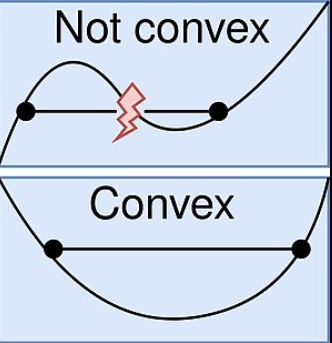 [59]

**2.Quadratic programming problem**
Quadratic Programming is a type of convex optimization where the goal is to minimize (or maximize) a quadratic function. A quadratic function is one that involves terms squared(like $x^2$). In SVMs, this quadratic function helps us find the best hyperplane that separates our data into classes.

Since our objective function is quadratic and our constraints are linear, this fits the definition of a Quadratic Programming problem.

There are some specifics of the Quadratic Programming problem, solved with the help of the Convex Optimization **cvxopt** Library

**Objective Function**

The goal of the SVM is to find the optimal hyperplane that maximizes the margin between two classes. This can be formulated as a Quadratic Programming (QP) problem.

The objective function to minimize is:

$$
\min_{\alpha} \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j \mathbf{x}_i^T \mathbf{x}_j - \sum_{i=1}^{n} \alpha_i
$$

Where:
- $\alpha_i$ are the Lagrange multipliers.
- $y_i$ are the class labels.
- $\mathbf{x}_i$ are the data points.
- $n$ is the number of samples.

In matrix form, this can be written as:

$$
\min_{\alpha} \frac{1}{2} \alpha^T P \alpha + q^T \alpha
$$

Where:
- $P = K = \left( y_i y_j \mathbf{x}_i^T \mathbf{x}_j \right)_{i,j=1}^{n}$ (the Kernel matrix)
- $q = -\mathbf{1}$ (a vector of -1's)

**Constraints**

The constraints for the QP problem are:

1. **Non-negativity constraints**:

$$
\alpha_i \geq 0 \quad \forall i = 1, \ldots, n
$$

This ensures that all Lagrange multipliers are non-negative.

In matrix form, this can be written as:

$$
G \alpha \leq h
$$

Where:
- $G = -I$ (negative identity matrix Like a unit matrix but with -1) 
- $h = \mathbf{0}$ (a vector of zeros)

2. **Equality constraint**:

$$
\sum_{i=1}^{n} \alpha_i y_i = 0
$$

This ensures that the Lagrange multipliers satisfy the balance condition for the classes.

In matrix form, this can be written as:

$$
A \alpha = b
$$

Where:
- $A = y^T$ (the row vector of class labels)
- $b = 0$ (a scalar zero)

**2.1 Complete Formulation**

Putting it all together, the complete quadratic programming problem for the SVM is:

**Objective Function:**

$$
\min_{\alpha} \frac{1}{2} \alpha^T P \alpha + q^T \alpha
$$

Where:
- $P = \left( y_i y_j \mathbf{x}_i^T \mathbf{x}_j \right)_{i,j=1}^{n}$
- $q = -\mathbf{1}$

**Constraints:**

1. **Non-negativity**:

$$
G \alpha \leq h
$$

Where:
- $G = -I$
- $h = \mathbf{0}$

2. **Equality**:

$$
A \alpha = b
$$

Where:
- $A = y^T$
- $b = 0$

**Explanation of Variables:**

- $\alpha$: Vector of Lagrange multipliers.
- $P$: Kernel matrix, $P = \left( y_i y_j \mathbf{x}_i^T \mathbf{x}_j \right)$.
- $q$: Vector of -1's, $q = -\mathbf{1}$.
- $G$: Negative identity matrix, $G = -I$.
- $h$: Vector of zeros, $h = \mathbf{0}$.
- $A$: Row vector of class labels, $A = y^T$.
- $b$: Scalar zero, $b = 0$.

**2.2 Summary of the Quadratic Programming Setup**

In the context of the SVM, the QP problem is formulated as follows:

**Objective Function:**
Minimize 
$$
\frac{1}{2} \alpha^T P \alpha + q^T \alpha
$$
where $\alpha$ are the Lagrange multipliers.

- **$P$**: Captures the interactions between data points in the feature space.
- **$q$**: Encourages maximization of the margin.

**Constraints:**
- **$G$ and $h$**: Ensure $\alpha \geq 0$, meaning the Lagrange multipliers are non-negative.
- **$A$ and $b$**: Ensure $\sum \alpha_i y_i = 0$, maintaining the balance between the classes.

**3.What is the Kernel Matrix and Why Do We Calculate It?**
In the context of Support Vector Machines (SVMs) and quadratic programming, the kernel matrix is a crucial component that captures the similarities (or interactions) between different data points in a transformed feature space. Let's break this down in detail.

**Why all that info and math again?**
I know this is a lot of info and I know i promised that I end with the math...but this is simple and it's basically just reformulating the formula we already know, to make it possible for the QP to be solved. 

#### **Implementation without Scikit Learn......Don't expect something insanely good or working well, I am new to this too.)**
Here I will try to implement the code without the library scikitlearn, but in order for me to actually implement SVM I need to solve the Convex optimization problem and for that I will use another library **cvxopt**  which is a Python library for convex optimization.To install it just write "pip install cvxopt" in a seperate code cell and it shall install.From the library we will use **matrix and solvers**.
Matrices are represented using the **matrix class**. This class is specifically designed for numerical optimization and provides a convenient way to handle matrix operations required in optimization problems. **Solvers** provides functions for solving various types of convex optimization problems. One of the key solvers in this module is the quadratic programming solver.

Let's get on with it, I will try to leave as many comments as I can.
1. First we will generate linearly seperable synthetic set using Numpy(literally just generating random samples)
2. Then we will display the DataFrame of the dataset
3. We will train the linear SVM using Quadratic programming(using w,b and the support vectors identified by the SVM)
4. After that we will plot the original dataset
5. And then we will plot the decision boundary along with the support vectors 

Dataset:
    Feature 1  Feature 2  Class
0   1.392452   1.873864      1
1   1.315394   2.928715      1
2   0.155599   1.532998      1
3   4.292490   2.488810      1
4   2.710267   3.055534      1
     pcost       dcost       gap    pres   dres
 0: -1.1177e+01 -2.1673e+01  3e+02  2e+01  2e+00
 1: -1.7054e+01 -1.2874e+01  1e+02  6e+00  7e-01
 2: -5.0844e+01 -2.5693e+01  1e+02  4e+00  5e-01
 3: -2.0549e+01 -4.6241e+00  3e+01  1e+00  1e-01
 4: -9.5036e-01 -1.7459e+00  8e-01  1e-15  8e-15
 5: -1.3890e+00 -1.4350e+00  5e-02  7e-16  2e-15
 6: -1.4248e+00 -1.4253e+00  6e-04  3e-16  2e-15
 7: -1.4252e+00 -1.4252e+00  6e-06  3e-16  2e-15
 8: -1.4252e+00 -1.4252e+00  6e-08  2e-16  2e-15
Optimal solution found.


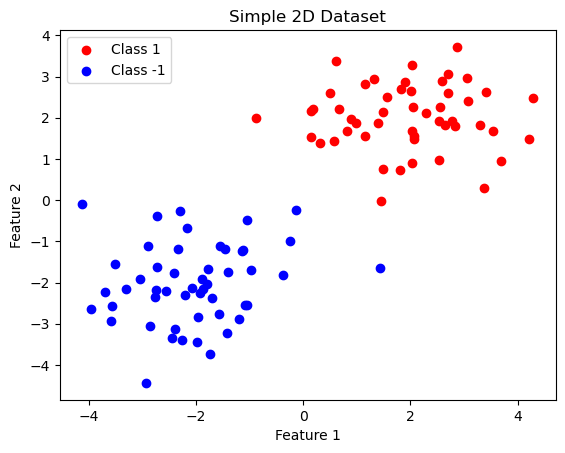

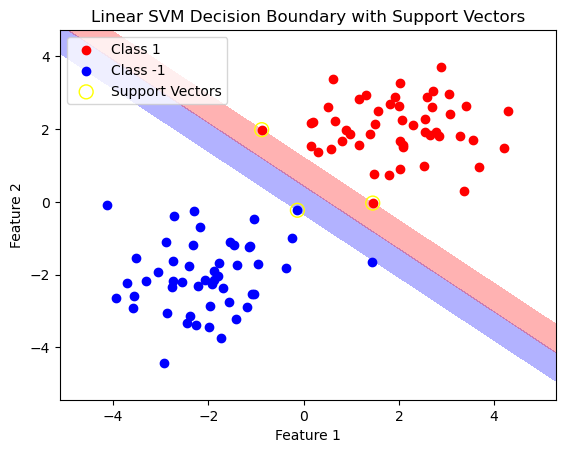

In [11]:
def generate_linearly_separable_dataset(n_samples=100, random_state=40): 
    """
    Generate a linearly separable synthetic 2D dataset for classification.
    
    Parameters:
    - n_samples: int, number of samples to generate
    - random_state: int, seed for random number generation to ensure reproducibility
     
    Returns:
    - X: ndarray, feature matrix (each row represents a sample, and each column represents a feature)
    - y: ndarray, target vector (each element represents the class label for the corresponding sample in X)
    """
    np.random.seed(random_state)
    X = np.random.randn(n_samples, 2)  # Generate random samples()
    X[:n_samples//2] = X[:n_samples//2] + 2  # Shift the first half to one cluster
    X[n_samples//2:] = X[n_samples//2:] - 2  # Shift the second half to another cluster
    y = np.array([1] * (n_samples // 2) + [-1] * (n_samples // 2))  # Generate class labels
    return X, y

def create_dataframe(X, y):
    """
    Create a DataFrame for better visualization of the dataset.
    
    Parameters:
    - X: ndarray, feature matrix
    - y: ndarray, target vector
    
    Returns:
    - df: DataFrame, dataset with feature columns and class labels
    """
    df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])  # Create DataFrame from features
    df['Class'] = y  # Add class labels to DataFrame
    return df

def plot_dataset(X, y, title='Dataset'):
    """
    Plot the dataset with two classes.
    
    Parameters:
    - X: ndarray, feature matrix
    - y: ndarray, target vector
    - title: str, title of the plot
    """
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')  # Plot class 1
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', label='Class -1')  # Plot class -1
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def plot_decision_boundary(X, y, w, b, support_vectors, title='Decision Boundary'):
    """
    Plot the decision boundary of an SVM model along with the dataset and support vectors.
    
    Parameters:
    - X: ndarray, feature matrix
    - y: ndarray, target vector
    - w: ndarray, weight vector of the SVM
    - b: float, bias term of the SVM
    - support_vectors: ndarray, support vectors
    - title: str, title of the plot
    """
    # Create a mesh grid for plotting decision boundary
    x0, x1 = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]  # Flatten the grid
    y_pred = np.dot(X_new, w) + b  # Predict the class for each point in the grid
    zz = y_pred.reshape(x0.shape)  # Reshape predictions back into a grid
    plt.contourf(x0, x1, zz, levels=[-1, 0, 1], alpha=0.3, cmap=ListedColormap(['blue', 'red']))  # Plot decision boundary
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')  # Plot class 1
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', label='Class -1')  # Plot class -1
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                facecolors='none', edgecolors='yellow', label='Support Vectors')  # Highlight support vectors
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def svm_qp(X, y):
    """
    Train a linear SVM using quadratic programming.
    
    Parameters:
    - X: ndarray, feature matrix
    - y: ndarray, target vector
    
    Returns:
    - w: ndarray, weight vector of the SVM
    - b: float, bias term of the SVM
    - support_vectors: ndarray, support vectors
    """
    n_samples, n_features = X.shape  # Get number of samples and features
    y = y.astype(float)  # Ensure y is of type float
    
    # Calculate the Kernel matrix
    K = np.outer(y, y) * np.dot(X, X.T)
    
    # Setup the parameters for the quadratic programming problem
    P = matrix(K)  # The matrix P in the QP problem
    q = matrix(-np.ones((n_samples, 1)))  # The vector q in the QP problem
    G = matrix(np.diag(-np.ones(n_samples)))  # The matrix G in the QP problem
    h = matrix(np.zeros(n_samples))  # The vector h in the QP problem
    A = matrix(y, (1, n_samples), 'd')  # The matrix A in the QP problem
    b = matrix(0.0)  # The vector b in the QP problem
    
    # Solve the QP problem using cvxopt
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])  # Extract the solution (Lagrange multipliers)
    
    # Identify the support vectors
    support_vector_indices = alphas > 1e-5  # Indices of non-zero alphas
    alphas = alphas[support_vector_indices.flatten()]  # Non-zero alphas
    support_vectors = X[support_vector_indices.flatten()]  # Support vectors
    support_vector_labels = y[support_vector_indices.flatten()]  # Labels of support vectors
    
    # Calculate the weight vector and bias term
    w = np.sum(alphas * support_vector_labels[:, None] * support_vectors, axis=0)
    b = np.mean(support_vector_labels - np.dot(support_vectors, w))
    
    return w, b, support_vectors

def main():
    # Generate and visualize the dataset
    X, y = generate_linearly_separable_dataset()
    
    # Create and display a DataFrame of the dataset
    df = create_dataframe(X, y)
    print("Dataset:\n", df.head())
    
    # Train a linear SVM using quadratic programming
    w, b, support_vectors = svm_qp(X, y)
    
    # Plot the original dataset
    plot_dataset(X, y, title='Simple 2D Dataset')
    
    # Plot the decision boundary along with support vectors
    plot_decision_boundary(X, y, w, b, support_vectors, title='Linear SVM Decision Boundary with Support Vectors')

if __name__ == "__main__":
    main()

WOW that worked....looks like it works, now let me explain those results(pcost,dcost and so on) and what are they.

**Solver Output Breakdown**

The output you see is from the cvxopt solver, which provides detailed information about the optimization process. Let's break down each component of the output to understand what it represents.

**Iteration Number**

Each line corresponds to an iteration of the solver's algorithm.

**Primal Cost (pcost)**

The primal cost is the value of the primal objective function at the current iteration. It represents the cost associated with the current solution from the primal perspective.

**Dual Cost (dcost)**

The dual cost is the value of the dual objective function at the current iteration. It represents the cost associated with the current solution from the dual perspective.

**Gap**

The gap is the difference between the primal and dual costs. It provides a measure of how close the current solution is to optimality. A smaller gap indicates a more optimal solution.

**Primal Residual (pres)**

The primal residual measures the violation of the primal constraints. It indicates how far the current solution is from satisfying the primal constraints. A smaller value indicates better satisfaction of the constraints.

**Dual Residual (dres)**

The dual residual measures the violation of the dual constraints. It indicates how far the current solution is from satisfying the dual constraints. A smaller value indicates better satisfaction of the constraints.

**Iterations**

0 Initial iteration shows a large gap and high residuals, indicating the solution is far from optimal.

1 Significant improvement, but still far from optimal.

2 Further improvement in costs and residuals.

3 Continued improvement, gap and residuals decreasing.

4 Significant reduction in gap and residuals, nearing optimal solution.

5 to 8: Further iterations show the gap and residuals decreasing to very small values (close to zero), indicating convergence to the optimal solution. 

**Convergence Criteria**

- **Gap**: The solver stops when the gap is sufficiently small, indicating that the primal and dual solutions are close to each other.
- **Residuals**: The primal and dual residuals should also be small, indicating that the constraints are satisfied.

The **cvxopt** solver output provides a step-by-step log of the optimization process, showing how the primal and dual costs, gap, and residuals change over iterations.

- The goal is to minimize the gap and residuals, achieving an optimal solution where the primal and dual costs converge.
- The solver iterates until the convergence criteria are met, typically resulting in small values for the gap, primal residual, and dual residual.



### **Polynomial Kernel SVM (With Scikit Learn)**

Let's see how the polynomial kernel works and take a look at the transformed data using the **polynomial kernel**. Again I will try to comment most things and explain some of them. ADDDDDDDDDDDDDD MORE THINGS HERE

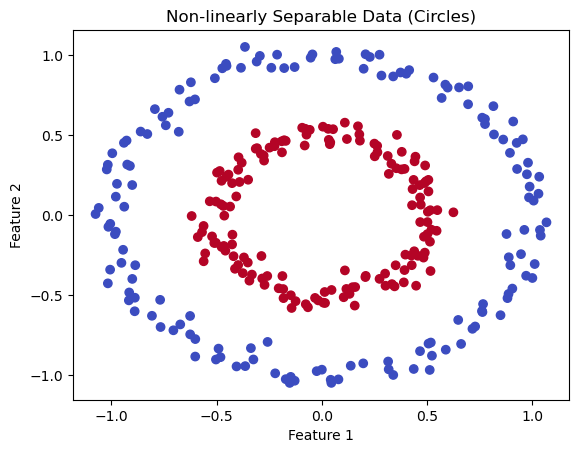

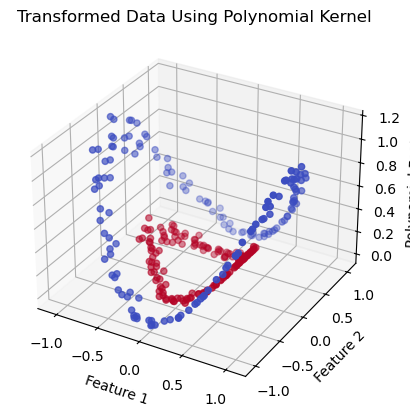

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        46

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



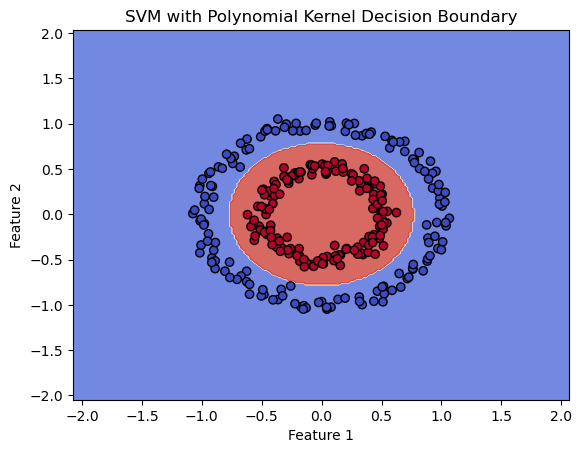

In [14]:
def create_dataset():
    """
    Create a non-linearly separable dataset with interleaving circles.
    
    Returns:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
    """
    X, y = make_circles(n_samples=300, factor=.5, noise=.05)
    return X, y

def plot_original_data(X, y):
    """
    Plot the original non-linearly separable dataset.
    
    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
    """
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title('Non-linearly Separable Data (Circles)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def transform_data(X):
    """
    Transform the data using a polynomial feature map.
    
    Args:
        X (np.ndarray): Original feature matrix.
    
    Returns:
        X_poly (np.ndarray): Transformed feature matrix.
    """
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    return X_poly

def plot_transformed_data(X_poly, y):
    """
    Plot the transformed data in 3D.
    
    Args:
        X_poly (np.ndarray): Transformed feature matrix.
        y (np.ndarray): Target vector.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_poly[:, 1], X_poly[:, 2], X_poly[:, 3], c=y, cmap=plt.cm.coolwarm)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Polynomial Feature')
    plt.title('Transformed Data Using Polynomial Kernel')
    plt.show()

def train_svm(X_train, y_train):
    """
    Train an SVM classifier with a polynomial kernel.
    
    Args:
        X_train (np.ndarray): Training feature matrix.
        y_train (np.ndarray): Training target vector.
    
    Returns:
        clf (SVC): Trained SVM classifier.
    """
    clf = SVC(kernel='poly', degree=2, C=1.0)
    clf.fit(X_train, y_train)
    return clf

def evaluate_model(clf, X_test, y_test):
    """
    Evaluate the SVM classifier and print accuracy and classification report.
    
    Args:
        clf (SVC): Trained SVM classifier.
        X_test (np.ndarray): Test feature matrix.
        y_test (np.ndarray): Test target vector.
    """
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

def plot_decision_boundary(clf, X, y):
    """
    Plot the decision boundary of the SVM classifier in the original 2D space.
    
    Args:
        clf (SVC): Trained SVM classifier.
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
    """
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM with Polynomial Kernel Decision Boundary')
    plt.show()

def main():
    # Step 1: Create and plot the original dataset
    X, y = create_dataset()
    plot_original_data(X, y)

    # Step 2: Transform the data and plot it in 3D
    X_poly = transform_data(X)
    plot_transformed_data(X_poly, y)

    # Step 3: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Step 4: Train the SVM classifier
    clf = train_svm(X_train, y_train)

    # Step 5: Evaluate the SVM classifier
    evaluate_model(clf, X_test, y_test)

    # Step 6: Plot the decision boundary in the original 2D space
    plot_decision_boundary(clf, X, y)

if __name__ == "__main__":
    main()

### RBF Kernel(with SciKit Learn)
Now let's see how the RBF Kernel works(with scikit learn). Here I will also use an integrated dataset called IRIS and we will also take a look at it to know what we doing. ADDDDDDDDDDDDDDD MORE THINGS HERE 

**Let's see what the dataset we use is and what features we are using and what is the target**

In [32]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [33]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [38]:
print(iris["feature_names"])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [37]:
print(iris["target"])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [36]:
print(iris["target_names"])

['setosa' 'versicolor' 'virginica']


Good I hope now you know what the dataset means, so let's get to work shall we?

**Here I will tune the hyperparameters gamma = 0.7 and C=1.0 to see what happens**

Let's see what happens now and then try with other parameters

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.62      0.77      0.69        13
           2       0.80      0.67      0.73        18

    accuracy                           0.80        45
   macro avg       0.81      0.81      0.81        45
weighted avg       0.81      0.80      0.80        45



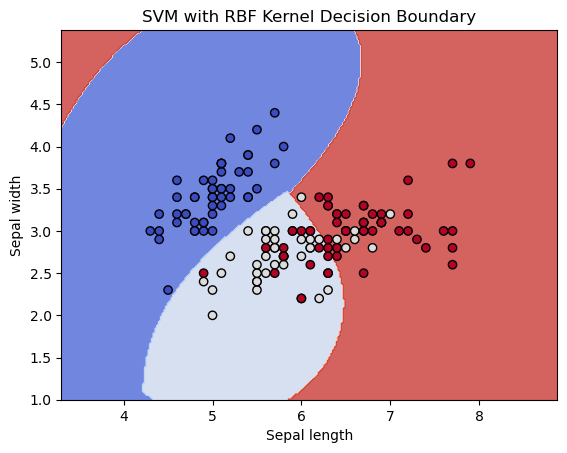

In [23]:
def load_dataset():
    """
    Load the Iris dataset and select the first two features for visualization.
    
    Returns:
        X (np.ndarray): Feature matrix with the first two features.
        y (np.ndarray): Target vector.
    """
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # We only take the first two features for visualization purposes
    y = iris.target
    return X, y

def split_dataset(X, y, test_size=0.3, random_state=49):
    """
    Split the dataset into training and testing sets.
    
    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Seed used by the random number generator.
    
    Returns:
        X_train, X_test, y_train, y_test: Split dataset.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def create_and_train_svm(X_train, y_train, kernel='rbf', gamma=0.7, C=1.0):
    """
    Create and train an SVM classifier.
    
    Args:
        X_train (np.ndarray): Training feature matrix.
        y_train (np.ndarray): Training target vector.
        kernel (str): Specifies the kernel type to be used in the algorithm.
        gamma (float): Kernel coefficient.
        C (float): Regularization parameter.
    
    Returns:
        clf (SVC): Trained SVM classifier.
    """
    clf = svm.SVC(kernel=kernel, gamma=gamma, C=C)
    clf.fit(X_train, y_train)
    return clf

def evaluate_model(clf, X_test, y_test):
    """
    Evaluate the SVM classifier and print accuracy and classification report.
    
    Args:
        clf (SVC): Trained SVM classifier.
        X_test (np.ndarray): Test feature matrix.
        y_test (np.ndarray): Test target vector.
    """
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

def plot_decision_boundary(clf, X, y, h=0.02):
    """
    Plot the decision boundary of the SVM classifier in the original 2D space.
    
    Args:
        clf (SVC): Trained SVM classifier.
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
        h (float): Step size in the mesh.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('SVM with RBF Kernel Decision Boundary')
    plt.show()

def main():
    # Step 1: Load the dataset
    X, y = load_dataset()
    
    # Step 2: Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = split_dataset(X, y)
    
    # Step 3: Create and train the SVM classifier
    clf = create_and_train_svm(X_train, y_train)
    
    # Step 4: Evaluate the SVM classifier
    evaluate_model(clf, X_test, y_test)
    
    # Step 5: Plot the decision boundary
    plot_decision_boundary(clf, X, y)

if __name__ == "__main__":
    main()

**Let's now tune the parameters gamma=0.01 and C=10**

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.61      0.85      0.71        13
           2       0.85      0.61      0.71        18

    accuracy                           0.80        45
   macro avg       0.82      0.82      0.81        45
weighted avg       0.83      0.80      0.80        45



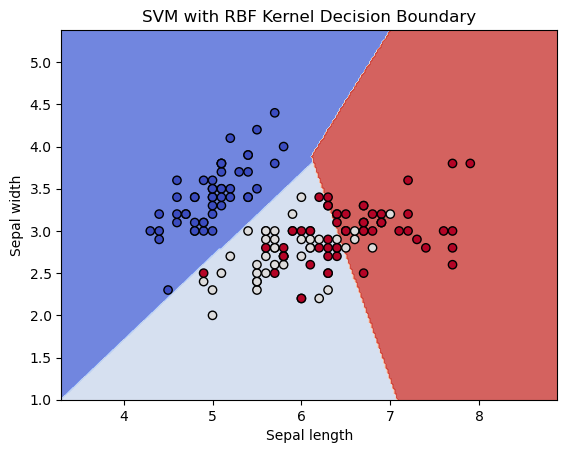

In [24]:
def load_dataset():
    """
    Load the Iris dataset and select the first two features for visualization.
    
    Returns:
        X (np.ndarray): Feature matrix with the first two features.
        y (np.ndarray): Target vector.
    """
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # We only take the first two features for visualization purposes ('sepal length (cm)', 'sepal width (cm)')
    y = iris.target  # target means the class 0,1,2 (the species of iris flowers ['setosa' 'versicolor' 'virginica'] )
    return X, y

def split_dataset(X, y, test_size=0.3, random_state=49):
    """
    Split the dataset into training and testing sets.
    
    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Seed used by the random number generator.
    
    Returns:
        X_train, X_test, y_train, y_test: Split dataset.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def create_and_train_svm(X_train, y_train, kernel='rbf', gamma=0.01, C=10):
    """
    Create and train an SVM classifier.
    
    Args:
        X_train (np.ndarray): Training feature matrix.
        y_train (np.ndarray): Training target vector.
        kernel (str): Specifies the kernel type to be used in the algorithm.
        gamma (float): Kernel coefficient.
        C (float): Regularization parameter.
    
    Returns:
        clf (SVC): Trained SVM classifier.
    """
    clf = svm.SVC(kernel=kernel, gamma=gamma, C=C)
    clf.fit(X_train, y_train)
    return clf

def evaluate_model(clf, X_test, y_test):
    """
    Evaluate the SVM classifier and print accuracy and classification report.
    
    Args:
        clf (SVC): Trained SVM classifier.
        X_test (np.ndarray): Test feature matrix.
        y_test (np.ndarray): Test target vector.
    """
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

def plot_decision_boundary(clf, X, y, h=0.02):
    """
    Plot the decision boundary of the SVM classifier in the original 2D space.
    
    Args:
        clf (SVC): Trained SVM classifier.
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
        h (float): Step size in the mesh.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('SVM with RBF Kernel Decision Boundary')
    plt.show()

def main():
    # Step 1: Load the dataset
    X, y = load_dataset()
    
    # Step 2: Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = split_dataset(X, y)
    
    # Step 3: Create and train the SVM classifier
    clf = create_and_train_svm(X_train, y_train)
    
    # Step 4: Evaluate the SVM classifier
    evaluate_model(clf, X_test, y_test)
    
    # Step 5: Plot the decision boundary
    plot_decision_boundary(clf, X, y)

if __name__ == "__main__":
    main()

**Conclusion**
As we can see the increase of $C$ smaller margin will be accepted if the decision function is better at classifying all training points correctly and the decrease of $\gamma$ will mean lower curvature(It will be straighter as we can see)

## **Applications of SVM's and why are they considered universal approximators**

### SVM's as universal approximators

**1. First of all what is an universal approximator?**

A universal approximator is a system or model that can approximate any continuous function to any desired level of accuracy, given sufficient resources such as data and model parameters. This concept is crucial in machine learning because it implies that the model has the flexibility and capacity to learn a wide variety of patterns and relationships in data. Universal approximators are particularly valuable because they assure us that, with the right configuration, the model can theoretically learn and represent any functional relationship within the data.

**2.Why are SVM's considered universal approximators**

Support Vector Machines (SVMs) are considered universal approximators due to their ability to approximate any continuous function to a desired level of accuracy, given sufficient data and an appropriate kernel. This property aligns them with **neural networks**, which are also known as universal approximators. The main reasons SVMs are universal approximators are rooted in the following concepts:

**2.1 KERNEL TRICK**
The kernel trick is central to the universal approximation capability of SVMs. Kernels allow SVMs to implicitly map input data into high-dimensional feature spaces where linear separation is possible.

1. By using kernels like the Gaussian Radial Basis Function (RBF) or polynomial kernels, SVMs can project data into a space of potentially infinite dimensions. This high-dimensional space provides the flexibility needed to approximate complex functions.

2. The Gaussian RBF kernel, in particular, is known for its universal approximation properties. Given enough data and an appropriate choice of parameters, the RBF kernel can approximate any continuous function on a compact domain(This is what makes it universal according to the universal approximators theorem). This is because the RBF kernel can create a feature space that is rich enough to represent intricate patterns and relationships. 

**2.2 Convex Optimization**
SVMs rely on convex optimization to find the optimal hyperplane that maximizes the margin between classes. Convex optimization problems have unique global minima, ensuring that the solution found is the best possible given the data and the chosen kernel.

The convex nature of the optimization problem in SVMs guarantees that the learning process will converge to the global minimum, providing reliable and optimal solutions that can approximate complex functions accurately.

**2.3 Regularization**
Regularization in SVMs, controlled by the parameter $C$ helps balance the trade-off between achieving a low training error and maintaining a large margin. This balance is crucial for generalization and avoiding overfitting.

Proper regularization ensures that the SVM model remains flexible enough to fit the training data while still generalizing well to new, unseen data. This property is essential for the model to serve as a universal approximator.

**2.4 Universal approximation theorem for SVM's**

Universal approximation theorem for SVMs, which states that, given an appropriate kernel and sufficient training data, SVMs can approximate any continuous function to any desired degree of accuracy. The theorem leverages the fact that kernels like the Gaussian RBF can create feature spaces of infinite dimensions, providing the necessary flexibility for approximation.

**2.5 Summary**

Support Vector Machines are universal approximators due to their use of the kernel trick, which allows them to model complex, non-linear relationships by mapping data into high-dimensional feature spaces. This capability, combined with optimization techniques ensures that SVMs can approximate any continuous function given sufficient data and appropriate kernel choices. This makes them powerful tools for a wide range of machine learning tasks, similar to neural networks.

But earlier on I said that SVM's are alligned with neural networks on their universal approximator capabilities, now we shall briefly explain compare between the two(as NN's are thought of as universal approximators) and furthermore engrave the fact that SVM's are indeed in the same category. 

**3. SVM's VS Neural Networks (Not so in-depth)**
Support Vector Machines (SVMs) and Neural Networks (NNs) are recognized as universal approximators, meaning they can approximate any continuous function to a desired degree of accuracy, given sufficient data and appropriate model configurations. Here’s a detailed comparison and explanation of their capabilities as universal approximators:

**3.1 Similarities**

1. Supervised Learning: Both are used in supervised learning settings, where the goal is to learn from labeled training data to make predictions on new, unseen data. 

2. Classification and Regression: Both models can be used for classification and regression tasks.

3. Non-linear Capabilities: Both can handle non-linear relationships in data. SVMs use kernel functions to map data into higher-dimensional spaces, whereas NNs use non-linear activation functions in their layers. Essentially, both methods do some kind of data transformation to "send" them into a higher dimensional space. What the kernel function does for the SVMs, the hidden layers do for neural networks[53]

4. Regularization: Both models incorporate regularization techniques to avoid overfitting. SVMs use the $C$ regularization parameter and kernel-specific parameters, while NNs use techniques like L2 regularization, dropout, and early stopping. [54]

**3.2 Differences**

- **Mathematical Foundation:**

**SVM**:Based on the concept of finding the hyperplane that best separates the classes in a high-dimensional space. They rely on convex optimization to find the optimal hyperplane. 

**Neural Networks**: Inspired by the structure and function of the human brain. It consists of interconnected nodes (neurons) organized in layers. NN learns by adjusting the weights and biases of connections between neurons to minimize the error in predictions. [55]

- **Model Structure**

**SVM**: Simpler in structure, primarily defined by the support vectors (the data points closest to the decision boundary). The complexity of SVMs is mainly in the kernel function used.

**Neural Networks**: Can have multiple layers (depth) and numerous neurons per layer (width), making them capable of learning highly complex patterns.[56]

- **Work with data**

**SVM**:Generally work well with smaller to medium-sized datasets. Performance may degrade with very large datasets due to computational constraints.

**Neural Networks**: Neural networks can handle large datasets more effectively, especially when trained using distributed computing or GPU acceleration, as they can process data in parallel across multiple nodes or processors.[57]

**3.3 Conclusion**

Support Vector Machines (SVMs) and Neural Networks (NNs) are both powerful machine learning models that can approximate complex functions, but they differ significantly in their structure and suitability for different dataset sizes and complexities.

I hope this paragraph helped you understand why are SVM's considered universal approximators, the examples are pretty vague but they do the job of explaining it briefly (Here we concentrate on SVM's...we shall talk all about the Neural Networks in the near future.)

### Applications of SVM's
We talked a lot about SVM's and how they are super useful and helpful, which they are. But now let's look at some real life applications of SVM's just to get a picture of how useful they are.

Support Vector Machines (SVMs) play a crucial role in our daily lives by enabling precise and efficient decision-making across various fields. For instance, in healthcare, SVMs assist in diagnosing diseases by analyzing patient data, and in finance, they predict creditworthiness by examining financial histories. In text classification, SVMs filter spam emails by identifying patterns in word usage. By constructing hyperplanes to separate different classes of data, SVMs ensure accurate classifications and predictions, making them invaluable in applications in many situations

**1.Some examples of the usage of SVM's in real life are:**
- Image Recognition: Facebook’s facial recognition feature uses SVM to identify faces in uploaded photos. Google Photos also uses SVM to categorize and search images.
- Speech Recognition: Apple’s Siri and Google Assistant use SVM to recognize voice commands.
- Medical Diagnosis: SVM is used in medical diagnosis to classify diseases, such as cancer, based on patient symptoms and test results.
- Fraud Detection: Credit card companies use SVM to detect fraudulent transactions.
- Sentiment Analysis: Companies use SVM to analyze customer feedback and sentiment on social media.
- Recommendation Systems: Online retailers like Amazon use SVM to recommend products based on customer behavior and preferences.
- Quality Control: SVM is used in manufacturing to classify products as defective or non-defective based on quality control metrics.  [58]
- Face detection – SVM's classify parts of the image as a face and non-face and create a square boundary around the face. [59]

And many many more. Now I shall give some that grabbed my atttention and I will try to explain them simply, not in depth.

**2.Somewhat explained examples of applications of SVM's**

**2.1 Text classification and sentiment analysis**
SVMs are effective in high-dimensional spaces and are well-suited for text data, where each word can be considered a feature. They handle large feature sets and sparse data efficiently.

**Example 1: Spam Detection**
- **How it works:** SVMs classify emails as spam or non-spam by analyzing the frequency and patterns of words and phrases in the emails.

- **Process:** Training data includes labeled examples of spam and non-spam emails. The SVM algorithm constructs a hyperplane in a high-dimensional space that separates spam from non-spam emails with the maximum margin. When a new email arrives, it is classified based on which side of the hyperplane it falls.

**Example 2: Sentiment analysis**
- **How it works:** SVMs classify customer reviews as positive, negative, or neutral by analyzing the words and phrases used in the text.

- **Process**
1. Training Data: Collect a dataset of customer reviews labeled as positive, negative, or neutral.
2. Feature Extraction: Convert the text reviews into numerical feature vectors, representing the frequency and importance of words.
3. Training: Use the labeled reviews to train the SVM. The algorithm constructs a hyperplane that best separates the different sentiment classes with the maximum margin.
4. Classification: For new reviews, the SVM predicts the sentiment by determining on which side of the hyperplane the review's feature vector falls.

**2.2 Image and Handwriting recognition**
SVMs work well in image processing. They can handle complex, non-linear relationships using kernel functions.

**Example: Handwriting recognition**
- **How it works:** SVMs recognize handwritten digits by classifying the pixel patterns of images.

- **Process** Training data consists of images of handwritten digits with known labels. Each image is converted into a feature vector (e.g., pixel intensities). The SVM algorithm uses these vectors to find a decision boundary in the feature space. For new digit images, the SVM predicts the digit by determining on which side of the boundary the vector falls.

**2.3 Healthcare**
SVMs provide high accuracy in classification tasks, which is crucial in medical diagnostics where accuracy can directly impact patient outcomes.

**Example: Disease Diagnosis**
- **How it works:** SVMs predict the presence of diseases like diabetes by analyzing patient data.
  
- **Process:** Training data comprises patient records with features such as blood sugar levels, age, and BMI, labeled as diabetic or non-diabetic. The SVM learns a decision boundary that separates the two classes. For a new patient, the SVM predicts diabetes status based on their data.

**2.4 Fraud detection**
SVMs are effective in anomaly detection, making them suitable for identifying fraudulent activities which are often rare and distinct from normal behavior.

**Example: Transaction Fraud Detection**
- **How it works:** SVMs detect fraudulent transactions by classifying transaction patterns.
  
- **Process:**  Training data contains transaction records labeled as fraudulent or legitimate. The SVM constructs a boundary to separate these classes. For new transactions, the SVM predicts fraud by checking if the transaction falls in the fraudulent region of the feature space.

**2.5 Bioinformatics**
SVMs are effective in dealing with the high dimensionality of biological data and are used for classifying complex patterns.

**Example: Gene Expression Data Analysis(Cancer Detection)**
- **How it works:** SVMs classify gene expression profiles to distinguish between cancerous and non-cancerous cells.

- **Process:** Training data includes gene expression levels for various samples labeled as cancerous or non-cancerous. The SVM algorithm constructs a hyperplane that separates the two classes. For new samples, the SVM determines the classification based on their position relative to the hyperplane.

**2.6 Cybersecurity**
SVMs can effectively classify complex patterns and detect anomalies, which are common in cybersecurity data.

**Example: Intrusion Detection**
- **How it works:** SVMs identify malicious activities in network traffic.

- **Process:** Training data includes network traffic labeled as normal or malicious. The SVM learns a decision boundary that separates the two types of traffic. For new network data, the SVM predicts intrusions based on where the data lies relative to the boundary.

**3. Summary**

Support Vector Machines (SVMs) simplify and improve tasks in various fields by automating complex processes and enhancing accuracy. They are valuable in text classification, such as spam detection and sentiment analysis, and in image recognition, including handwriting and face detection. In healthcare, SVMs aid in disease diagnosis and medical imaging. In finance, they help with credit scoring and fraud detection. In cybersecurity, SVMs monitor network traffic and classify software as benign or malicious. Overall, SVMs enhance efficiency and outcomes in many applications.

## Conclusion
After all we have been through what did we learn? 

Support Vector Machines (SVMs) are used because they are highly effective for classification and regression tasks, especially with high-dimensional data. They work by finding the best boundary (hyperplane) that separates different classes of data with the maximum margin, which helps improve accuracy and prevent overfitting. SVMs can handle both linear and non-linear data by using kernel functions to transform the data into a higher-dimensional space where it can be more easily separated. This makes SVMs a versatile and powerful tool for various machine learning applications.

In this tutorial I aimed to explain to you what SVM's are and how they work and what is the Kernel Trick. I showed you "a little bit" of math concepts behind them and explain it in a bit more detail. Tried to make things more clear by showing you some implementations of SVM's and examples of how it works and also to give you some applications in real life to somehow motivate you to learn SVM's and apply them in your future work. I hope I didn't torture you much with all the information and math, but sometimes things need to be explained in more detail in order to be understood and I do surely hope it was useful to whoever is reading this. 

## Bibliography(References)

1.  Zoumana Keita, "Classification in Machine Learning: An Introduction.", September 2022,Link: https://www.datacamp.com/blog/classification-machine-learning?dc_referrer=https%3A%2F%2Fwww.google.com%2F#:~:text=Classification%20is%20a%20supervised%20machine%20learning%20method%20where%20the%20model%20tries%20to%20predict%20the%20correct%20label%20of%20a%20given%20input%20data.%20In%20classification%2C%20the%20model%20is%20fully%20trained%20using%20the%20training%20data%2C%20and%20then%20it%20is%20evaluated%20on%20test%20data%20before%20being%20used%20to%20perform%20prediction%20on%20new%20unseen%20data.

2. Amazon AWS Blog, "What is Sentiment Analysis?", Link: https://aws.amazon.com/what-is/sentiment-analysis/#:~:text=Sentiment%20analysis%20is%20the%20process%20of%20analyzing%20digital%20text%20to%20determine%20if%20the%20emotional%20tone%20of%20the%20message%20is%20positive%2C%20negative%2C%20or%20neutral.%20Today%2C%20companies%20have%20large%20volumes%20of%20text%20data%20like%20emails%2C%20customer%20support%20chat%20transcripts%2C%20social%20media%20comments%2C%20and%20reviews.

3. IBM Blog. "What is supervised learning?", Link: https://www.ibm.com/topics/supervised-learning#:~:text=Supervised%20learning%2C%20also%20known%20as%20supervised%20machine%20learning%2C%20is%20a%20subcategory%20of%C2%A0machine%20learning%C2%A0and%C2%A0artificial%20intelligence.%20It%20is%20defined%20by%20its%20use%20of%20labeled%20data%20sets%20to%20train%20algorithms%20that%20to%20classify%20data%20or%20predict%20outcomes%20accurately.

4. Tasmay Pankaj Tibrewal,"Support Vector Machines (SVM): An Intuitive Explanation", 
Jul 1, 202, Link:  https://medium.com/low-code-for-advanced-data-science/support-vector-machines-svm-an-intuitive-explanation-b084d6238106#:~:text=A%20hyperplane%20is%20a%20decision%20boundary%20that%20separates%20data%20points%20into%20different%20classes%20in%20a%20high%2Ddimensional%20space.%20In%20two%2Ddimensional%20space%2C%20a%20hyperplane%20is%20simply%20a%20line%20that%20separates%20the%20data%20points%20into%20two%20classes.

5. DeepChecks Blog."Hyperplane",  https://deepchecks.com/glossary/hyperplane/#:~:text=In%20Machine%20Learning%2C%20a%20hyperplane%20is%20a%20decision%20boundary%20that%20divides%20the%20input%20space%20into%20two%20or%20more%20regions%2C%20each%20corresponding%20to%20a%20different%20class%20or

6. Farnaz Ghassemi Toudeshki, "SVM model", 
June 2  2022, Link: https://medium.com/@farnazgh73/svm-model-2898e54b583f#:~:text=In%20the%20case%20of%20support%2Dvector%20machines%2C%20a%20data%20point%20is%20viewed%20as%20a%20p%2Ddimensional%20vector%20(a%20list%20of%20p%20numbers)%2C%20and%20we%20want%20to%20know%20whether%20we%20can%20separate%20such%20points%20with%20a%20(p%2D1)%2Ddimensional%20hyperplane.%20This%20is%20called%20a%20linear%20classifier.%20There%20are%20many%20hyperplanes%20that%20might%20classify%20the%20data.3g

7.  DominoAi Blog, "What is a Feature in Machine Learning and Data Science?", Link: https://domino.ai/data-science-dictionary/feature

8. Tasmay Pankaj Tibrewal, "Support Vector Machines (SVM): An Intuitive Explanation", Jul 1 2023, Link: https://medium.com/low-code-for-advanced-data-science/support-vector-machines-svm-an-intuitive-explanation-b084d6238106 

9. Tasmay Pankaj Tibrewal, "Support Vector Machines (SVM): An Intuitive Explanation", Jul 1 2023, Link: https://medium.com/low-code-for-advanced-data-science/support-vector-machines-svm-an-intuitive-explanation-b084d6238106

10. Tasmay Pankaj Tibrewal, "Support Vector Machines (SVM): An Intuitive Explanation", Jul 1 2023, Link: https://medium.com/low-code-for-advanced-data-science/support-vector-machines-svm-an-intuitive-explanation-b084d6238106

11. MLMath.io, "Math behind SVM (Support Vector Machine)", 
Feb 10, 201 , Link: https://ankitnitjsr13.medium.com/math-behind-support-vector-machine-svm-5e7376d0ee4d9
 
12. GeeksForGeeks Blog, "Using a Hard Margin vs Soft Margin in SVM", Link: https://www.geeksforgeeks.org/using-a-hard-margin-vs-soft-margin-in-svm/

13. GeeksForGeeks Blog, "Using a Hard Margin vs Soft Margin in SVM", Link: https://www.geeksforgeeks.org/using-a-hard-margin-vs-soft-margin-in-svm/

14. Hemant Warudkar , "How to Find Outliers in Data using Machine Learning",  11 Sep 2020, Link: https://www.expressanalytics.com/blog/outliers-machine-learning/#:~:text=An%20outlier%20is%20a%20data%20point%20that%20is%20noticeably%20different%20from%20the%20rest.%20They%20represent%20errors%20in%20measurement%2C%20bad%20data%20collection%2C%20or%20simply%20show%20variables%20not%20considered%20when%20collecting%20the%20data

15. Hemant Warudkar , "How to Find Outliers in Data using Machine Learning",  11 Sep 2020, Link: https://www.expressanalytics.com/blog/outliers-machine-learning/#:~:text=An%20outlier%20is%20a%20data%20point%20that%20is%20noticeably%20different%20from%20the%20rest.%20They%20represent%20errors%20in%20measurement%2C%20bad%20data%20collection%2C%20or%20simply%20show%20variables%20not%20considered%20when%20collecting%20the%20data

16. Opporture Blog, "Misclassification Rate", Link: https://www.opporture.org/lexicon/misclassification-rate/#:~:text=Misclassification%20rate%20is%20a%20machine,predictions%2F%20Total%20number%20of%20prediction

17. Opporture Blog, "Misclassification Rate", Link: https://www.opporture.org/lexicon/misclassification-rate/#:~:text=Misclassification%20rate%20is%20a%20machine,predictions%2F%20Total%20number%20of%20prediction

18. Praveen Sinha, "ML | Non-Linear SVM", 01 Aug 2023, Link: https://www.geeksforgeeks.org/ml-non-linear-svm/#:~:text=Nonlinear%20SVM%20(Support,real%2Dworld%20scenarios

19. Anshul Saini, "Guide on Support Vector Machine (SVM) Algorithm", 22 May 2024, Link: https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/

20. Image from: Anshul Saini, "Guide on Support Vector Machine (SVM) Algorithm", 22 May 2024, Link:  https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/

21. Image from: Anshul Saini, "Guide on Support Vector Machine (SVM) Algorithm", 22 May 2024, Link:  https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/

22. Image from: Anshul Saini, "Guide on Support Vector Machine (SVM) Algorithm", 22 May 2024, Link:  https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/

23. Image from : aswathisasidharan, "Support Vector Machine (SVM) Algorithm", 10 Jun 2023, Link: https://www.geeksforgeeks.org/support-vector-machine-algorithm/?ref=next_article

24. Image from : aswathisasidharan, "Support Vector Machine (SVM) Algorithm", 10 Jun 2023, Link: https://www.geeksforgeeks.org/support-vector-machine-algorithm/?ref=next_article

25. Image from : aswathisasidharan, "Support Vector Machine (SVM) Algorithm", 10 Jun 2023, Link: https://www.geeksforgeeks.org/support-vector-machine-algorithm/?ref=next_article

26. MLMath.io, "Math behind SVM (Support Vector Machine)", Feb 10 2019, Link: https://ankitnitjsr13.medium.com/math-behind-support-vector-machine-svm-5e7376d0ee4d

27. Image from : MLMath.io, "Math behind SVM (Support Vector Machine)", Feb 10 2019, Link: https://ankitnitjsr13.medium.com/math-behind-support-vector-machine-svm-5e7376d0ee4d

28. Cuemath Blog, "Direction of a Vector", Link: https://www.cuemath.com/direction-of-a-vector-formula/

29. ChatGPT, OpenAI, Visited 4 June 2024

30 Image from : Alexandre KOWALCZYK "SVM - Understanding the math - Part 2", November 9, 2014 , Link: https://www.svm-tutorial.com/2014/11/svm-understanding-math-part-2/

31. Image from : Alexandre KOWALCZYK "SVM - Understanding the math - Part 2", November 9, 2014 , Link: https://www.svm-tutorial.com/2014/11/svm-understanding-math-part-2/

32. Erhan Arslan, "Understanding the Dot Product", Nov 23 2023, Link: https://medium.com/@erhan_arslan/understanding-the-dot-product-b1724505355f#:~:text=The%20dot%20product%2C%20also%20known%20as%20the%20scalar%20product%20or,different%20ways%20across%20various%20domains.

33. Alexandre KOWALCZYK "SVM - Understanding the math - Part 2", November 9, 2014 , Link: https://www.svm-tutorial.com/2014/11/svm-understanding-math-part-2/

34. Images from : Shuzhan Fan , "Understanding the mathematics behind Support Vector Machines", May 7 2018, Link: https://shuzhanfan.github.io/2018/05/understanding-mathematics-behind-support-vector-machines/

35. Shuzhan Fan , "Understanding the mathematics behind Support Vector Machines", May 7 2018, Link: https://shuzhanfan.github.io/2018/05/understanding-mathematics-behind-support-vector-machines/

36. Shuzhan Fan , "Understanding the mathematics behind Support Vector Machines", May 7 2018, Link: https://shuzhanfan.github.io/2018/05/understanding-mathematics-behind-support-vector-machines/

37. Image from : Shuzhan Fan , "Understanding the mathematics behind Support Vector Machines", May 7 2018, Link: https://shuzhanfan.github.io/2018/05/understanding-mathematics-behind-support-vector-machines/

38. MLMath.io, "Math behind SVM (Support Vector Machine)", Feb 10 2019, Link: https://ankitnitjsr13.medium.com/math-behind-support-vector-machine-svm-5e7376d0ee4d

39. Image from : MLMath.io, "Math behind SVM (Support Vector Machine)", Feb 10 2019, Link: https://ankitnitjsr13.medium.com/math-behind-support-vector-machine-svm-5e7376d0ee4d

40. Shuzhan Fan , "Understanding the mathematics behind Support Vector Machines", May 7 2018, Link: https://shuzhanfan.github.io/2018/05/understanding-mathematics-behind-support-vector-machines/

41. Shuzhan Fan , "Understanding the mathematics behind Support Vector Machines", May 7 2018, Link: https://shuzhanfan.github.io/2018/05/understanding-mathematics-behind-support-vector-machines/

42. Shuzhan Fan , "Understanding the mathematics behind Support Vector Machines", May 7 2018, Link: https://shuzhanfan.github.io/2018/05/understanding-mathematics-behind-support-vector-machines/

43.  Tommi Jaakkola, course materials for 6.867 Machine Learning, Fall 2006. MIT OpenCourseWare 
(http://ocw.mit.edu/), Massachusetts Institute of Technolog, Link: https://ocw.mit.edu/courses/6-867-machine-learning-fall-2006/59a63d2efbe8aa01041937ff539a449a_lec4.pdfy

44. Suraj Yadav, "What is Kernel Trick in SVM ? Interview questions related to Kernel Trick", Apr 29 2023, Link: https://medium.com/@Suraj_Yadav/what-is-kernel-trick-in-svm-interview-questions-related-to-kernel-trick-97674401c48d

45. ChatGPT, OpenAI, Visited on 5 june 2024

46. Images and info from: Suraj Yadav, "What is Kernel Trick in SVM ? Interview questions related to Kernel Trick", Apr 29 2023, Link: https://medium.com/@Suraj_Yadav/what-is-kernel-trick-in-svm-interview-questions-related-to-kernel-trick-97674401c48d

47. Suraj Yadav, "What is Kernel Trick in SVM ? Interview questions related to Kernel Trick", Apr 29 2023, Link: https://medium.com/@Suraj_Yadav/what-is-kernel-trick-in-svm-interview-questions-related-to-kernel-trick-97674401c48d

48. Shuzhan Fan , "Understanding the mathematics behind Support Vector Machines", May 7 2018, Link: https://shuzhanfan.github.io/2018/05/understanding-mathematics-behind-support-vector-machines/

49. ChatGPT, OpenAI, Visited on 5 june 2024

50. ChatGPT, OpenAI, Visited on 5 june 2024
51. ChatGPT, OpenAI, Visited on 5 june 2024

52. ChatGPT, OpenAI, Visited on 6 june 2024

53. Igor F ,"Are neural networks better than SVMs?", 18 Feb 2021, Answer to forum question, Link: https://stats.stackexchange.com/questions/510052/are-neural-networks-better-than-svms#:~:text=Essentially%2C%20both%20methods%20do%20some%20kind%20of%20data%20transformation%20to%20%22send%22%20them%20into%20a%20higher%20dimensional%20space.%20What%20the%20kernel%20function%20does%20for%20the%20SVMs%2C%20the%20hidden%20layers%20do%20for%20neural%20networks.

54. Bala Priya C, "Regularization in Neural Networks", June 30 2023, Link: https://www.pinecone.io/learn/regularization-in-neural-networks/

55. GeekForGeeks, "Weights and Bias in Neural Networks" , 25 apr 2024, Link: https://www.geeksforgeeks.org/the-role-of-weights-and-bias-in-neural-networks/

56. dido7, "Support Vector Machines vs Neural Networks" , 13 Feb 2024, Link: https://www.geeksforgeeks.org/support-vector-machines-vs-neural-networks/

57. dido7, "Support Vector Machines vs Neural Networks" , 13 Feb 2024, Link: https://www.geeksforgeeks.org/support-vector-machines-vs-neural-networks/0
